In [ ]:
%pip install -q amplpy
from amplpy import AMPL, ampl_notebook
ampl = ampl_notebook(
    modules=["highs", "cbc", "gurobi", "cplex"], # pick from over 20 modules including most commercial and open-source solvers
    license_uuid="coloque a sua licença aqui") # your license UUID (e.g., free ampl.com/ce or ampl.com/courses licenses)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 18.1 MB/s eta 0:00:00
Licensed to AMPL Community Edition License for <g##############@outlook.com>.


# Aula 1: Testanto AMPL

In [ ]:
# Crie uma instância do AMPL
ampl = AMPL()

# Defina o modelo
model = """
var  x1 integer >= 0;
var  x2 integer >= 0;
var  x3 integer >= 0;
var  x4 integer >= 0;
var  x5 integer >= 0;


var venda = 35*x1 + 40*x2 + 55*x3 + 25*x4 + 50*x5;;
var gasto = 20*(x1 + 5*x2 + 7*x3 + 6*x4 + 4*x5)/60 +
            15* (6*x1 + 2*x2 + 4*x3 + 2*x4 + 5*x5 )/60 +
            35*(4*x1+ 3*x2 + 2*x3 + 1*x4 +3*x5)/60;

maximize L: venda - gasto;

s.t. R1: (2*x1 + 5*x2 + 7*x3 + 6*x4 + 4*x5)/60 <= 700;
s.t. R2: (6*x1 + 2*x2 + 4*x3 + 2*x4 + 5*x5)/60 <= 580;
s.t. R3: (4*x1 + 3*x2 + 2*x3 + 1*x4 + 3*x5)/60 <= 800;

"""
# Carregue o modelo no AMPL
ampl.eval(model)

# Configure o solver CPLEX
ampl.setOption('solver', 'cplex')

# Resolva o problema
ampl.solve()

CPLEX 22.1.2: CPLEX 22.1.2: optimal solution within tolerance; objective 392024.75
2 simplex iterations
absmipgap=16.4265, relmipgap=4.19016e-05


#Lista 1

Lista 1- Ex4

Um produto requer 20 ferramentas e 100 etapas para ser construído. As etapas devem ser executadas sequencialmente e, em cada etapa, existe uma determinada ferramenta a ser usada. As ferramentas a serem usadas em cada etapa são:

    11, 5, 4, 12, 15, 8, 8, 16, 3, 1, 2, 6, 1, 1, 19, 7, 15, 6, 19, 9, 5, 6, 18, 15, 14, 16, 18, 20, 9, 16, 5, 6, 14, 16, 13, 4, 4, 6, 17, 4, 7, 11, 19, 18, 5, 2, 8, 7, 20, 14, 17, 17, 4, 15, 2, 4, 9, 17, 19, 5, 4, 14, 9, 18, 19, 2, 20, 15, 7, 19, 11, 12, 1, 9, 16, 3, 1, 4, 14, 7, 18, 12, 7, 17, 1, 6, 3, 17, 10, 17, 7, 6, 9, 15, 16, 8, 9, 13, 9, 19.
    
  É possível usar, no máximo, 5 ferramentas por vez e toda vez que for necessário trocar alguma ferramenta há um custo de \$20. Por exemplo, começando com as ferramentas 11, 5, 4, 12 e 15 pode-se fazer as 5 primeiras etapas, mas para fazer a próxima etapa será necessário a ferramenta 8. Portanto, haverá a necessidade de trocar alguma das ferramentas atuais (11, 5, 4, 12, 15) pela ferramenta 8. Qual deve ser trocada? Implemente uma estratégia de como construir o produto ao menor custo possível e apresente o resultado obtido com essa estratégia. **Para esta questão, não é necessário formular um modelo de otimização.**

In [ ]:
def calcular_custo_minimo(etapas, max_ferramentas=5, custo_troca=20):
    ferramentas_atuais = set(etapas[:max_ferramentas])
    custo_total = 0

    for i in range(len(etapas)):
        if etapas[i] not in ferramentas_atuais:
            # Determinar a ferramenta a ser substituída
            menos_usada = None
            maior_distancia = -1
            for f in ferramentas_atuais:
                if f in etapas[i:]:
                    distancia = etapas[i:].index(f)
                else:
                    distancia = len(etapas)  # Se não for mais usada
                if distancia > maior_distancia:
                    maior_distancia = distancia
                    menos_usada = f

            # Substituir a ferramenta e atualizar o custo
            ferramentas_atuais.remove(menos_usada)
            ferramentas_atuais.add(etapas[i])
            custo_total += custo_troca

            # Considerar otimizações aqui para escolha de ferramentas

    return custo_total

# Lista de ferramentas usadas em cada etapa
etapas = [
    11, 5, 4, 12, 15, 8, 8, 16, 3, 1, 2, 6, 1, 1, 19, 7, 15, 6, 19, 9, 5, 6, 18,
    15, 14, 16, 18, 20, 9, 16, 5, 6, 14, 16, 13, 4, 4, 6, 17, 4, 7, 11, 19, 18, 5,
    2, 8, 7, 20, 14, 17, 17, 4, 15, 2, 4, 9, 17, 19, 5, 4, 14, 9, 18, 19, 2, 20,
    15, 7, 19, 11, 12, 1, 9, 16, 3, 1, 4, 14, 7, 18, 12, 7, 17, 1, 6, 3, 17, 10,
    17, 7, 6, 9, 15, 16, 8, 9, 13, 9, 19
]

custo_total = calcular_custo_minimo(etapas)
print(f"O custo total de trocas é: ${custo_total}")

O custo total de trocas é: $1000


# Lista 2

In [ ]:
# Criar todos os modelos e dados de todos problemas dessa lista

################## MODELO ###############################
# Conteúdo do arquivo modelo_lista2_ex1.ampl
conteudo_ampl = """
param TempoDisponivel;
param G_tempo;
param A_tempo;
param G_lucro;
param A_lucro;
param ProblemasMinimos;

var G integer >= 0; # Quantidade de problemas geométricos
var A integer >= 0; # Quantidade de problemas algébricos

maximize LucroTotal: G_lucro*G + A_lucro*A;

subject to NumeroMinimoProblemas: G + A >= ProblemasMinimos;
subject to MaisGeometricos: G - A >= 1;
subject to LimiteTempo: G_tempo*G + A_tempo*A <= TempoDisponivel;
"""

# Escrever o conteúdo no arquivo
with open("/content/modelo_lista2_ex1.ampl", "w") as file:
    file.write(conteudo_ampl)
################## DADOS ###############################
# Conteúdo do arquivo dados_lista2_ex1.ampl
conteudo_ampl = """
param TempoDisponivel = 240;
param G_tempo = 4;
param A_tempo = 5;
param G_lucro = 30;
param A_lucro = 50;
param ProblemasMinimos := 50;
"""

# Escrever o conteúdo no arquivo
with open("/content/dados_lista2_ex1.dat", "w") as file:
    file.write(conteudo_ampl)

################## MODELO ###############################
# Conteúdo do arquivo modelo_lista2_ex2.ampl
conteudo_ampl = """
set Machines;
set Tasks;

param Time{Machines, Tasks};

var Allocation{Machines, Tasks} >= 0, <= 1;

minimize TotalTime: sum {m in Machines, t in Tasks} Time[m, t] * Allocation[m, t];

subj to CompleteTasks {t in Tasks}:
    sum {m in Machines} Allocation[m, t] = 1;

subj to MachineCapacity {m in Machines}:
    sum {t in Tasks} Allocation[m, t] <= 1;
"""

# Escrever o conteúdo no arquivo
with open("/content/modelo_lista2_ex2.ampl", "w") as file:
    file.write(conteudo_ampl)

################## MODELO ###############################
# Conteúdo do arquivo modelo2_lista2_ex2.ampl
conteudo_ampl = """
set Tasks;
set Machines;

param Time{Machines, Tasks};

var X{Tasks, Machines} binary;
var FIM{Tasks};

minimize TotalTime: sum{t in Tasks} FIM[t];

subject to Completa{t in Tasks}: sum{m in Machines} X[t,m] = 1;
subject to UmaTarefaPorMaquina{m in Machines}: sum{t in Tasks} X[t,m] <= 1;
subject to TimeTermino{t in Tasks}: FIM[t] >= sum{m in Machines} Time[m,t] * X[t,m];
"""

# Escrever o conteúdo no arquivo
with open("/content/modelo2_lista2_ex2.ampl", "w") as file:
    file.write(conteudo_ampl)
################## DADOS ###############################
# Conteúdo do arquivo dados_lista2_ex2.ampl
conteudo_ampl = """
set Machines = 1 2 3 4 5;
set Tasks = 1 2 3;

param Time :  1  2  3 :=
            1   2  3  1
            2   3  2  3
            3   1  3  5
            4   4  1  3
            5   2  4  1;
"""

# Escrever o conteúdo no arquivo
with open("/content/dados_lista2_ex2.dat", "w") as file:
    file.write(conteudo_ampl)

################## MODELO ###############################
# Conteúdo do arquivo modelo_lista2_ex3.ampl
conteudo_ampl = """
set MATERIAIS;
param Resistencia{MATERIAIS};
param Cor{MATERIAIS};
param Textura{MATERIAIS};
param Preco{MATERIAIS};

param QuantidadeRequerida;
param ResistenciaMinima;
param CorMinima;
param TexturaMinima;


var Quantidade{MATERIAIS} >= 0;


minimize CustoTotal: sum{i in MATERIAIS} Preco[i] * Quantidade[i];


subject to TotalQuantidade: sum{i in MATERIAIS} Quantidade[i] = QuantidadeRequerida;

subject to ResistenciaRequerida:
    sum{i in MATERIAIS} (Resistencia[i] * Quantidade[i]) / QuantidadeRequerida >= ResistenciaMinima;

subject to CorRequerida:
    sum{i in MATERIAIS} (Cor[i] * Quantidade[i]) / QuantidadeRequerida >= CorMinima;

subject to TexturaRequerida:
    sum{i in MATERIAIS} (Textura[i] * Quantidade[i]) / QuantidadeRequerida >= TexturaMinima;
"""

# Escrever o conteúdo no arquivo
with open("/content/modelo_lista2_ex3.ampl", "w") as file:
    file.write(conteudo_ampl)
################## DADOS ###############################
# Conteúdo do arquivo dados_lista2_ex1.ampl
conteudo_ampl = """
set MATERIAIS = 1 2 3 4;

param: Resistencia Cor Textura Preco :=
1  8  9  8  150
2  6  7  5  110
3  5  5  6   90
4  3  4  5   50;

param QuantidadeRequerida = 500;
param ResistenciaMinima = 7;
param CorMinima = 5;
param TexturaMinima = 6;
"""

# Escrever o conteúdo no arquivo
with open("/content/dados_lista2_ex3.dat", "w") as file:
    file.write(conteudo_ampl)



Ex 2-  N tarefas precisam ser realizadas. Existem M máquinas para realizar essas tarefas. Uma tarefa pode ser executada (parcialmente) por várias máquinas até ser completada, mas cada máquina pode executar, no máximo, 1 tarefa. O tempo para executar cada tarefa depende da máquina. Como as tarefas devem ser executadas de modo a minimizar o tempo total de execução? Para executar o modelo, considere os seguintes tempos de execução:

\begin{table}[h]
\centering
\begin{tabular}{|c|c|c|c|}
\hline
\rowcolor{lightgray}
\multicolumn{1}{|c|}{\cellcolor{lightgray}} & \multicolumn{3}{c|}{Tarefa} \\ \cline{2-4}
\rowcolor{lightgray}
\multicolumn{1}{|c|}{\cellcolor{lightgray}Máquina} & 1 & 2 & 3 \\ \hline
\cellcolor{lightgray}1 & 2 & 3 & 1 \\ \hline
\cellcolor{lightgray}2 & 3 & 2 & 3 \\ \hline
\cellcolor{lightgray}3 & 1 & 3 & 5 \\ \hline
\cellcolor{lightgray}4 & 4 & 1 & 3 \\ \hline
\cellcolor{lightgray}5 & 2 & 4 & 1 \\ \hline
\end{tabular}
\end{table}

In [ ]:
# Carregar o arquivo de modelo
ampl.reset()
ampl.read("/content/modelo_lista2_ex2.ampl")

# Carregar o arquivo de dados
ampl.readData("/content/dados_lista2_ex2.dat")

# Configure o solver CPLEX
ampl.setOption('solver', 'cplex')

# Resolva o problema
ampl.solve()

# Exibir o status da solução
print(ampl.getObjective('TotalTime').value())

# Exibir as alocações de tarefas para máquinas
allocation = ampl.getVariable('Allocation')
for m in ampl.getSet('Machines'):
    for t in ampl.getSet('Tasks'):
        print(f'Máquina {m}, Tarefa {t}: {allocation.get(m, t).value()}')


CPLEX 22.1.1.0: optimal solution; objective 3
0 dual simplex iterations (0 in phase I)
3.0
Máquina 1, Tarefa 1: 0.0
Máquina 1, Tarefa 2: 0.0
Máquina 1, Tarefa 3: 1.0
Máquina 2, Tarefa 1: 0.0
Máquina 2, Tarefa 2: 0.0
Máquina 2, Tarefa 3: 0.0
Máquina 3, Tarefa 1: 1.0
Máquina 3, Tarefa 2: 0.0
Máquina 3, Tarefa 3: 0.0
Máquina 4, Tarefa 1: 0.0
Máquina 4, Tarefa 2: 1.0
Máquina 4, Tarefa 3: 0.0
Máquina 5, Tarefa 1: 0.0
Máquina 5, Tarefa 2: 0.0
Máquina 5, Tarefa 3: 0.0


Solução alternativa

In [ ]:
# Carregar o arquivo de modelo
ampl.reset()
ampl.read("/content/modelo2_lista2_ex2.ampl")

# Carregar o arquivo de dados
ampl.readData("/content/dados_lista2_ex2.dat")

# Configure o solver CPLEX
ampl.setOption('solver', 'cplex')

# Resolva o problema
ampl.solve()

# Exibir o status da solução
print(ampl.getObjective('TotalTime').value())

# Exibir as alocações de tarefas para máquinas
allocation = ampl.getVariable('X')
for m in ampl.getSet('Tasks'):
    for t in ampl.getSet('Machines'):
        print(f'Máquina {t}, Tarefa {m}: {allocation.get(m, t).value()}')


CPLEX 22.1.1.0: optimal integer solution; objective 3
0 MIP simplex iterations
0 branch-and-bound nodes
3.0
Máquina 1, Tarefa 1: 0.0
Máquina 2, Tarefa 1: 0.0
Máquina 3, Tarefa 1: 1.0
Máquina 4, Tarefa 1: 0.0
Máquina 5, Tarefa 1: 0.0
Máquina 1, Tarefa 2: 0.0
Máquina 2, Tarefa 2: 0.0
Máquina 3, Tarefa 2: 0.0
Máquina 4, Tarefa 2: 1.0
Máquina 5, Tarefa 2: 0.0
Máquina 1, Tarefa 3: 0.0
Máquina 2, Tarefa 3: 0.0
Máquina 3, Tarefa 3: 0.0
Máquina 4, Tarefa 3: 0.0
Máquina 5, Tarefa 3: 1.0


ex 3 -Uma empresa produz papelão reciclado para fabricantes de caixas, combinando quatro tipos de material. Cada tipo de material tem resistência, cor e textura próprias. A resistência, a cor e a textura do papelão é a média ponderada das características dos materiais usados em sua fabricação. A ponderação é feita pelas quantidades usadas de cada material. A tabela a seguir apresenta as características dos materiais e seu custo por tonelada. A empresa recebeu um pedido de 500 toneladas de papelão com resistência de pelo menos 7, cor de pelo menos 5 e textura de pelo menos 6. Determinar a combinação menos dispendiosa necessária para a empresa produzir este papelão.

\begin{table}[h]
\centering
\label{tab:material_caracteristicas}
\begin{tabular}{|c|c|c|c|c|}
\hline
\rowcolor{lightgray} Material & Resistência & Cor & Textura & Preço/Ton \\ \hline
1 & 8 & 9 & 8 & 150 \\ \hline
2 & 6 & 7 & 5 & 110 \\ \hline
3 & 5 & 5 & 6 & 90  \\ \hline
4 & 3 & 4 & 5 & 50  \\ \hline
\end{tabular}
\end{table}


In [ ]:
# Carregar o arquivo de modelo
ampl.reset()
ampl.read("/content/modelo_lista2_ex3.ampl")

# Carregar o arquivo de dados
ampl.readData("/content/dados_lista2_ex3.dat")

# Configure o solver CPLEX
ampl.setOption('solver', 'cplex')

# Resolva o problema
ampl.solve()

# Exibir o status da solução
print(ampl.getObjective('CustoTotal').value())

# Exibir as quantidades de cada material usadas na produção do papelão
quantidade_material = ampl.getVariable('Quantidade')
for material in ampl.getSet('MATERIAIS'):
    print(f'Material {material}: {quantidade_material.get(material).value()} toneladas')


CPLEX 22.1.1.0: optimal solution; objective 65000
1 dual simplex iterations (0 in phase I)
65000.0
Material 1: 400.0 toneladas
Material 2: 0.0 toneladas
Material 3: 0.0 toneladas
Material 4: 100.0 toneladas


ex 1 -  Um aluno de PO201 cria problemas matemáticos para um site. Ele ganha \$30 por problema geométrico e \$50 por problema algébrico. Em média, ele leva 4 minutos para criar um problema geométrico e 5 minutos para criar um problema algébrico. O site precisa de, pelo menos, 50 problemas e deseja mais problemas geométricos do que algébricos. Se o aluno tem 4 horas disponíveis, quantos problemas ele deverá escrever para obter o maior ganho?

In [ ]:
# Carregar o arquivo de modelo
ampl.reset()
ampl.read("/content/modelo_lista2_ex1.ampl")

# Carregar o arquivo de dados
ampl.readData("/content/dados_lista2_ex1.dat")

# Configure o solver CPLEX
ampl.setOption('solver', 'cplex')

# Resolva o problema
ampl.solve()

# Exibir o valor da função objetivo (lucro total)
print("Lucro Total: $", ampl.getObjective('LucroTotal').value())

# Exibir o número de problemas geométricos e algébricos criados
num_geom = ampl.getVariable('G').value()
num_alg = ampl.getVariable('A').value()
print("Número de problemas geométricos:", num_geom)
print("Número de problemas algébricos:", num_alg)

#Curiosidade: Não sei o motivo, mas se no modelo eu trocar G - A >=1 por
#G-A>0 ou G > A, o programa não roda.

CPLEX 22.1.1.0: optimal integer solution; objective 2110
1 MIP simplex iterations
0 branch-and-bound nodes
Lucro Total: $ 2110.0
Número de problemas geométricos: 27.0
Número de problemas algébricos: 26.0


# Lista 4

In [ ]:
# Criar todos os modelos e dados de todos problemas dessa lista

################## MODELO ###############################
# Conteúdo do arquivo modelo_lista4_ex1.ampl
conteudo_ampl = """
# Declaração das variáveis de decisão
var x >= 0;
var y >= 0;

# Função objetivo a ser minimizada
minimize Z: 12.5*x + 14.5*y;

# Restrições do problema
subject to Restricao1: x + y >= 200;
subject to Restricao2: 0.4*x + 0.75*y >= 100;
subject to Restricao3: 7.5*x + 0.1*y <= 200;
"""

# Escrever o conteúdo no arquivo
with open("/content/modelo_lista4_ex1.ampl", "w") as file:
     file.write(conteudo_ampl)
# ################## DADOS ###############################
# # Conteúdo do arquivo dados_lista4_ex1.ampl
# conteudo_ampl = """

# """

# # Escrever o conteúdo no arquivo
# with open("/content/dados_lista4_ex1.dat", "w") as file:
#     file.write(conteudo_ampl)

# Carregar o arquivo de modelo
ampl.reset()
ampl.read("/content/modelo_lista4_ex1.ampl")

# # Carregar o arquivo de dados
# ampl.readData("/content/dados_lista4_ex1.dat")

# Configure o solver CPLEX
ampl.setOption('solver', 'cplex')

# Resolva o problema
ampl.solve()

# Exibir o valor das variáveis
num_geom = ampl.getVariable('x').value()
num_alg = ampl.getVariable('y').value()
print("Valor de x:", num_geom)
print("Valor de y:", num_alg)

# Exibir valor da função objetivo
print("Z: ", ampl.getObjective('Z').value())

CPLEX 22.1.1.0: optimal solution; objective 2851.351351
2 dual simplex iterations (0 in phase I)
Valor de x: 24.32432432432432
Valor de y: 175.67567567567568
Z:  2851.3513513513517


In [ ]:
# Criar todos os modelos e dados de todos problemas dessa lista

################## MODELO ###############################
# Conteúdo do arquivo modelo_lista4_ex2.ampl
conteudo_ampl = """
# Definição das variáveis de decisão
var x1 >= 0;
var x2 >= 0;
var x3 >= 0;

# Função objetivo a ser maximizada
maximize Z: 12*x1 + 15*x2 + 9*x3;

# Restrições do problema
subject to Restricao1: 8*x1 + 16*x2 + 12*x3 <= 250;
subject to Restricao2: 4*x1 + 8*x2 + 10*x3 >= 80;
subject to Restricao3: 7*x1 + 9*x2 + 8*x3 = 105;
"""
# Escrever o conteúdo no arquivo
with open("/content/modelo_lista4_ex2.ampl", "w") as file:
     file.write(conteudo_ampl)

# Carregar o arquivo de modelo
ampl.reset()
ampl.read("/content/modelo_lista4_ex2.ampl")

# # Carregar o arquivo de dados
# ampl.readData("/content/dados_lista4_ex2.dat")

# Configure o solver CPLEX
ampl.setOption('solver', 'cplex')

# Resolva o problema
ampl.solve()

# Exibir o valor das variáveis
x1 = ampl.getVariable('x1').value()
x2 = ampl.getVariable('x2').value()
x3 = ampl.getVariable('x3').value()
print("Valor de x1:", x1)
print("Valor de x2:", x2)
print("Valor de x3:", x3)

# Exibir valor da função objetivo
print("Z: ", ampl.getObjective('Z').value())

CPLEX 22.1.1.0: optimal solution; objective 177
2 dual simplex iterations (1 in phase I)
Valor de x1: 5.999999999999998
Valor de x2: 7.000000000000001
Valor de x3: 0.0
Z:  177.0


In [ ]:
# Criar todos os modelos e dados de todos problemas dessa lista

################## MODELO ###############################
# Conteúdo do arquivo modelo_lista4_ex3.ampl
conteudo_ampl = """
# Definição das variáveis de decisão
var x1 >= 0;
var x2 >= 0;
var x3 >= 0;

# Função objetivo a ser minimizada
minimize Z: 5*x1 + 4*x2 - 3*x3;

# Restrições do problema
subject to Restricao1: x1 + 3*x2 + 2*x3 <= 30;
subject to Restricao2: 2*x1 - 3*x2 + x3 <= -20;
"""
# Escrever o conteúdo no arquivo
with open("/content/modelo_lista4_ex3.ampl", "w") as file:
     file.write(conteudo_ampl)

# Carregar o arquivo de modelo
ampl.reset()
ampl.read("/content/modelo_lista4_ex3.ampl")


# Configure o solver CPLEX
ampl.setOption('solver', 'cplex')

# Resolva o problema
ampl.solve()

# Exibir o valor das variáveis
x1 = ampl.getVariable('x1').value()
x2 = ampl.getVariable('x2').value()
x3 = ampl.getVariable('x3').value()
print("Valor de x1:", x1)
print("Valor de x2:", x2)
print("Valor de x3:", x3)

# Exibir valor da função objetivo
print("Z: ", ampl.getObjective('Z').value())

CPLEX 22.1.1.0: optimal solution; objective 21.11111111
0 dual simplex iterations (0 in phase I)
Valor de x1: 0.0
Valor de x2: 7.777777777777778
Valor de x3: 3.333333333333334
Z:  21.111111111111107


In [ ]:
# Criar todos os modelos e dados de todos problemas dessa lista

################## MODELO ###############################
# Conteúdo do arquivo modelo_lista4_ex4.ampl
conteudo_ampl = """
# Definição das variáveis de decisão
var x1 >= 0;
var x2 >= 0;
var x3 >= 0;

# Função objetivo a ser minimizada
minimize Z: x1 + x2 + x3;

# Restrições do problema
subject to Restricao1: -x1 + x2 - x3 <= -2;
subject to Restricao2: 2*x1 - 2*x2 - x3 <= 0;
subject to Restricao3: x1 + 3*x2 + x3 <= 2;
"""
# Escrever o conteúdo no arquivo
with open("/content/modelo_lista4_ex4.ampl", "w") as file:
     file.write(conteudo_ampl)

# Carregar o arquivo de modelo
ampl.reset()
ampl.read("/content/modelo_lista4_ex4.ampl")


# Configure o solver CPLEX
ampl.setOption('solver', 'cplex')

# Resolva o problema
ampl.solve()

# Exibir o valor das variáveis
x1 = ampl.getVariable('x1').value()
x2 = ampl.getVariable('x2').value()
x3 = ampl.getVariable('x3').value()
print("Valor de x1:", x1)
print("Valor de x2:", x2)
print("Valor de x3:", x3)

# Exibir valor da função objetivo
print("Z: ", ampl.getObjective('Z').value())

CPLEX 22.1.1.0: optimal solution; objective 2
2 dual simplex iterations (0 in phase I)
Valor de x1: 0.6666666666666666
Valor de x2: 0.0
Valor de x3: 1.3333333333333333
Z:  2.0


#Lista 5

Ex1

In [ ]:
# Criar todos os modelos e dados de todos problemas dessa lista

################## MODELO ###############################
# Conteúdo do arquivo modelo_lista5_ex1.ampl
conteudo_ampl = """
set Produtos;

param Ganho{Produtos};
param Despesa{Produtos};

var Selecionado{Produtos} binary;

maximize Lucro:
    sum{i in Produtos} (Ganho[i] - Despesa[i]) * Selecionado[i];

subject to Orçamento:
    sum{i in Produtos} Despesa[i] * Selecionado[i] <= 400;

subject to Dependência1:
    Selecionado[2] <= Selecionado[1];

subject to Dependência2:
    Selecionado[2] + Selecionado[4] <= 1;

subject to Dependência3:
    Selecionado[7] <= Selecionado[3];

subject to Dependência4:
    Selecionado[7] + Selecionado[8] <= 1;

"""

# Escrever o conteúdo no arquivo
with open("/content/modelo_lista5_ex1.ampl", "w") as file:
    file.write(conteudo_ampl)

################## DADOS ###############################
# Conteúdo do arquivo dados_lista5_ex1.ampl
conteudo_ampl = """
set Produtos := 1 2 3 4 5 6 7 8 9 10;

param Ganho :=
    1 160
    2 220
    3 120
    4 80
    5 180
    6 200
    7 210
    8 150
    9 90
    10 140
;

param Despesa :=
    1 50
    2 70
    3 40
    4 30
    5 60
    6 90
    7 100
    8 70
    9 30
    10 60
;

"""

# Escrever o conteúdo no arquivo
with open("/content/dados_lista5_ex1.dat", "w") as file:
    file.write(conteudo_ampl)

# Carregar o arquivo de modelo
ampl.reset()
ampl.read("/content/modelo_lista5_ex1.ampl")

# Carregar o arquivo de dados
ampl.readData("/content/dados_lista5_ex1.dat")

# Configure o solver Gurobi
ampl.setOption('solver', 'gurobi')

# Resolva o problema
ampl.solve()

# Exibir o valor das variáveis
sel = ampl.getVariable('Selecionado')
for produto in sel.getValues():
    print("Produto", produto[0], ": Selecionado =", produto[1])

# Exibir valor da função objetivo
print("Z:", ampl.getObjective('Lucro').value())



Gurobi 11.0.1: Gurobi 11.0.1: optimal solution; objective 710
2 simplex iterations
1 branching node
Produto 1 : Selecionado = 1
Produto 2 : Selecionado = 1
Produto 3 : Selecionado = 1
Produto 4 : Selecionado = 0
Produto 5 : Selecionado = 1
Produto 6 : Selecionado = 1
Produto 7 : Selecionado = 0
Produto 8 : Selecionado = 0
Produto 9 : Selecionado = 1
Produto 10 : Selecionado = 1
Z: 710.0


Ex2
2. Problema de sequenciamento de tarefas em máquina única: N tarefas precisam
ser processadas em uma máquina. A máquina consegue processar apenas 1 tarefa de
cada vez. O processamento de uma tarefa, uma vez iniciado não pode ser interrompido.
O processamento começa no instante 0. Cada tarefa i tem um tempo de processamento ti e um instante devido de término di. Se o instante de término da tarefa i for fi > di haverá um atraso (fi - di). Em que sequência deve-se processar as N tarefas de modo a
minimizar a soma dos atrasos?


No exercício 2, o instante de início (ei) de uma tarefa é uma variável de decisão. O tempo de processamento de uma tarefa (ti) é um parâmetro. Portanto, o instante de término de uma tarefa (fi) é simplesmente, ei + ti. Para cada tarefa, existe um instante devido de término (di). Assim, se fi > di, haverá um atraso ai na execução dessa tarefa. O objetivo é descobrir qual deve ser a sequência de processamento das tarefas de modo a minimizar a soma dos atrasos.
 Por exemplo:
```
param n := 5;
param t := 0 0 1 2 2 1 3 3 4 2 5 2;
param d := 0 0 1 3 2 5 3 4 4 8 5 3;
```
(0 é uma tarefa fictícia, com ti = 0)

Se a sequência de processamento das tarefas for: 1,2,3,4,5
Teremos:

a tarefa 1 começa no instante 0 e termina no instante 2. Como d1 = 3, não há atraso.

a tarefa 2 começa no instante 2 e termina no instante 3. Como d2 = 5, não há atraso.

a tarefa 3 começa no instante 3 e termina no instante 6. Como d3 = 4, há atraso de 2.

a tarefa 4 começa no instante 6 e termina no instante 8. Como d4 = 8, não há atraso.

a tarefa 5 começa no instante 8 e termina no instante 10. Como d5 = 3, há atraso de 7.

Portanto, nesta sequência, o atraso total será: 2 + 7 = 9.

In [ ]:
import amplpy as ampl

# Criar uma instância do AMPL
ampl_instance = ampl.AMPL()

# Definir o modelo AMPL
modelo_ampl = """
param n;
set Tarefas := 1..n;
param t{Tarefas};  # Tempo de processamento
param d{Tarefas};  # Prazo de entrega

var e{Tarefas} >= 0;  # Instante de início de cada tarefa
var f{Tarefas};  # Instante de término de cada tarefa
var a{Tarefas} >= 0;  # Atraso de cada tarefa

# Variáveis binárias para a ordem das tarefas
var x{Tarefas, Tarefas} binary;

# Função objetivo: Minimizar a soma dos atrasos
minimize TotalAtraso: sum{i in Tarefas} a[i];

# Restrições
subject to Processo{i in Tarefas}:
    f[i] = e[i] + t[i];

subject to AtrasoMinimo{i in Tarefas}:
    a[i] >= 0;

subject to Atraso{i in Tarefas}:
    a[i] >= f[i] - d[i];

subject to Ordem{i in Tarefas, j in Tarefas: i != j}:
    e[j] >= f[i] - 1000*(1 - x[i,j]);

subject to Precedencia{i in Tarefas, j in Tarefas: i != j}:
    x[i,j] + x[j,i] = 1;
"""

# Escrever o conteúdo do modelo no arquivo modelo.ampl
with open("modelo.ampl", "w") as file:
    file.write(modelo_ampl)

# Definir os dados AMPL
dados_ampl = """
param n := 5;
param t := 1 2 2 1 3 3 4 2 5 2;
param d := 1 3 2 5 3 4 4 8 5 3;
"""

# Escrever o conteúdo dos dados no arquivo dados.dat
with open("dados.dat", "w") as file:
    file.write(dados_ampl)

# Carregar o arquivo de modelo
ampl_instance.reset()
ampl_instance.read("modelo.ampl")

# Carregar o arquivo de dados
ampl_instance.readData("dados.dat")

# Configurar o solver Gurobi
ampl_instance.setOption('solver', 'gurobi')

# Resolver o problema
ampl_instance.solve()

# Obter os valores das variáveis
x_values = ampl_instance.getVariable('x').getValues().toDict()
e_values = ampl_instance.getVariable('e').getValues().toDict()
a_values = ampl_instance.getVariable('a').getValues().toDict()


n=5
n=n+1
# Exibir a variável x em forma matricial
print("Variável x:")
for i in range(1, n):
    row = []
    for j in range(1, n):
        row.append(int(x_values[(i, j)]))
    print(row)

# Exibir o início de cada tarefa (e)
print("\nInstante de início de cada tarefa (e):")
for i in range(1, n):
    print("Tarefa {}: {}".format(i, e_values[i]))

# Exibir o atraso de cada tarefa (a)
print("\nAtraso de cada tarefa (a):")
for i in range(1, n):
    print("Tarefa {}: {}".format(i, a_values[i]))


Gurobi 11.0.1: Gurobi 11.0.1: optimal solution; objective 7
298 simplex iterations
49 branching nodes
Variável x:
[0, 1, 1, 1, 0]
[0, 0, 1, 1, 0]
[0, 0, 0, 1, 0]
[0, 0, 0, 0, 0]
[1, 1, 1, 1, 0]

Instante de início de cada tarefa (e):
Tarefa 1: 2
Tarefa 2: 4
Tarefa 3: 5
Tarefa 4: 8
Tarefa 5: 0

Atraso de cada tarefa (a):
Tarefa 1: 1
Tarefa 2: 0
Tarefa 3: 4
Tarefa 4: 2
Tarefa 5: 0


ex3

In [ ]:
# Conteúdo do arquivo modelo_lista5_ex3.ampl
conteudo_ampl = """
set Colecao;  # conjunto de objetos
param v{Colecao};  # valores dos objetos

var a{Colecao} binary;  # variáveis binárias indicando se o objeto está na subcoleção A
var b{Colecao} binary;  # variáveis binárias indicando se o objeto está na subcoleção B

minimize obj: abs(sum{i in Colecao} v[i] * a[i] - sum{i in Colecao} v[i] * b[i]);

subject to one_subcollection_per_object {i in Colecao}: a[i] + b[i] = 1;
"""

# Escrever o conteúdo no arquivo
with open("/content/modelo_lista5_ex3.ampl", "w") as arquivo:
    arquivo.write(conteudo_ampl)

################## DADOS ###############################
# Conteúdo do arquivo dados_lista5_ex3.ampl
conteudo_ampl = """
set Colecao := 1 2 3 4 5;

param v :=
    1 10
    2 7
    3 3
    4 6
    5 5
"""
# Escrever o conteúdo no arquivo
with open("/content/dados_lista5_ex3.dat", "w") as arquivo:
    arquivo.write(conteudo_ampl)

# Carregar o arquivo de modelo
ampl.reset()
ampl.read("/content/modelo_lista5_ex3.ampl")

# Carregar o arquivo de dados
ampl.readData("/content/dados_lista5_ex3.dat")

# Configurar o solver Gurobi
ampl.setOption('solver', 'gurobi')

# Resolver o problema
ampl.solve()

# Obter as variáveis
a_var = ampl.getVariable('a')
b_var = ampl.getVariable('b')

# Inicializar listas para produtos em A e B
produtos_em_a = []
produtos_em_b = []

# Percorrer todos os produtos
for produto in a_var.getValues():
    if produto[1] == 1:
        produtos_em_a.append(produto[0])

for produto in b_var.getValues():
    if produto[1] == 1:
        produtos_em_b.append(produto[0])

# Calcular a diferença nos valores
v = ampl.getParameter('v')
valor_a = sum(v[i] for i in produtos_em_a)
valor_b = sum(v[i] for i in produtos_em_b)
dif_valor = abs(valor_a - valor_b)

# Imprimir os resultados
print("Produtos em A:", produtos_em_a)
print("Produtos em B:", produtos_em_b)
print("Diferença nos valores:", dif_valor)


Gurobi 11.0.1: Gurobi 11.0.1: optimal solution; objective 1
6 simplex iterations
1 branching node
Produtos em A: [1, 5]
Produtos em B: [2, 3, 4]
Diferença nos valores: 1


ex4

In [ ]:
# Conteúdo do arquivo modelo_lista5_ex2.ampl
conteudo_ampl = """
# Conjuntos
set Periodo;

# Parâmetros
param Demanda{Periodo};
param qntMotoristas;

# Variáveis
var x{i in 1..qntMotoristas, j in Periodo} binary;
var y{j in 1..qntMotoristas} binary;
var z{i in 1..qntMotoristas, j in 1..card(Periodo)} binary;  # Variável auxiliar

# Objetivo
minimize obj: sum{j in 1..qntMotoristas} y[j];

# Restrições
subject to RDemanda{j in Periodo}:
    sum{i in 1..qntMotoristas} x[i,j] >= Demanda[j];


subject to TresPeriodosDeFolgaMaisUm{i in 1..qntMotoristas}:
    sum{j in Periodo} x[i,j] <= 2 * y[i];

subject to RestricaoHorasConsecutivas1{i in 1..qntMotoristas, j in 1..card(Periodo)-1}:
    z[i,j] >= x[i,j] + x[i,j+1] - 1;  # Se x[i,j] = x[i,j+1] = 1, então z[i,j] = 1

subject to RestricaoHorasConsecutivas2{i in 1..qntMotoristas, j in 1..card(Periodo)-1}:
    z[i,j] <= x[i,j];  # Se x[i,j] = 0, então z[i,j] = 0

subject to RestricaoHorasConsecutivas3{i in 1..qntMotoristas, j in 1..card(Periodo)-1}:
    z[i,j] <= x[i,j+1];  # Se x[i,j+1] = 0, então z[i,j] = 0

subject to RestricaoHorasConsecutivas4{i in 1..qntMotoristas}:
    z[i,card(Periodo)] >= x[i,1] + x[i,card(Periodo)] - 1;  # Se x[i,1] = x[i,card(Periodo)] = 1, então z[i,j] = 1

subject to RestricaoHorasConsecutivas5{i in 1..qntMotoristas}:
    z[i,card(Periodo)] <= x[i,card(Periodo)];  # Se x[i,j] = 0, então z[i,j] = 0

subject to RestricaoHorasConsecutivas6{i in 1..qntMotoristas, j in 1..card(Periodo)-1}:
    z[i,card(Periodo)] <= x[i,1];  # Se x[i,1] = 0, então z[i,j] = 0

subject to RestricaoHorasConsecutivas7{i in 1..qntMotoristas, k in 1..card(Periodo)}:
    sum{j in 1..card(Periodo)} z[i,j] = y[i];  # A soma das variáveis z para cada motorista deve ser igual a 1
"""

# Escrever o conteúdo no arquivo
with open("/content/modelo_lista5_ex4.ampl", "w") as arquivo:
    arquivo.write(conteudo_ampl)

################## DADOS ###############################
# Conteúdo do arquivo dados_lista5_ex4.ampl
conteudo_ampl = """
set Periodo := 1 2 3 4 5 6;
param Demanda :=
1 4
2 8
3 10
4 7
5 12
6 3;
param qntMotoristas := 35;
"""
# Escrever o conteúdo no arquivo
with open("/content/dados_lista5_ex4.dat", "w") as arquivo:
    arquivo.write(conteudo_ampl)

# Carregar o arquivo de modelo
ampl.reset()
ampl.read("/content/modelo_lista5_ex4.ampl")

# Carregar o arquivo de dados
ampl.readData("/content/dados_lista5_ex4.dat")

# Configurar o solver Gurobi
ampl.setOption('solver', 'gurobi')

# Resolver o problema
ampl.solve()




# Obter os valores de x como uma matriz
x_values = ampl.getVariable('x').getValues().toList()
qntmotoristas=ampl.getParameter('qntMotoristas').value();
# Criar uma matriz para armazenar os valores de x
matriz_x = [[0 for _ in range(6)] for _ in range(qntmotoristas)]  # Assumindo que há 20 motoristas e 6 períodos

# Preencher a matriz com os valores de x
for produto in x_values:
    motorista = produto[0]
    periodo = produto[1]
    valor_x = produto[2]
    matriz_x[motorista - 1][periodo - 1] = valor_x

# Imprimir a matriz
print("Disposição matricial dos valores de x:")
for i in range(qntmotoristas):
    print("Motorista", i + 1, ":\t", matriz_x[i])

# Obter os valores de x como uma matriz
x_values = ampl.getVariable('z').getValues().toList()
qntmotoristas=ampl.getParameter('qntMotoristas').value();
# Criar uma matriz para armazenar os valores de x
matriz_x = [[0 for _ in range(6)] for _ in range(qntmotoristas)]  # Assumindo que há 20 motoristas e 6 períodos

# Preencher a matriz com os valores de x
for produto in x_values:
    motorista = produto[0]
    periodo = produto[1]
    valor_x = produto[2]
    matriz_x[motorista - 1][periodo - 1] = valor_x

# Imprimir a matriz
print("Disposição matricial dos valores de x:")
for i in range(qntmotoristas):
    print("Motorista", i + 1, ":\t", matriz_x[i])

print("Qual motorista vai, e qual não vai:")
sel = ampl.getVariable('y')
for produto in sel.getValues():
    print("Motorista", produto[0], ", ", produto[1])

# Exibir valor da função objetivo
print("Z:", ampl.getObjective('obj').value())

Gurobi 11.0.1: Gurobi 11.0.1: optimal solution; objective 26
554 simplex iterations
1 branching node
Disposição matricial dos valores de x:
Motorista 1 :	 [0, 0, 1, 1, 0, 0]
Motorista 2 :	 [0, 0, 0, 1, 1, 0]
Motorista 3 :	 [0, 0, 1, 1, 0, 0]
Motorista 4 :	 [0, 0, 0, 1, 1, 0]
Motorista 5 :	 [0, 0, 0, 1, 1, 0]
Motorista 6 :	 [0, 0, 0, 0, 0, 0]
Motorista 7 :	 [1, 1, 0, 0, 0, 0]
Motorista 8 :	 [1, 1, 0, 0, 0, 0]
Motorista 9 :	 [0, 0, 0, 0, 1, 1]
Motorista 10 :	 [0, 1, 1, 0, 0, 0]
Motorista 11 :	 [0, 0, 0, 1, 1, 0]
Motorista 12 :	 [1, 1, 0, 0, 0, 0]
Motorista 13 :	 [0, 0, 0, 0, 0, 0]
Motorista 14 :	 [0, 0, 1, 1, 0, 0]
Motorista 15 :	 [0, 0, 0, 1, 1, 0]
Motorista 16 :	 [0, 1, 1, 0, 0, 0]
Motorista 17 :	 [0, 1, 1, 0, 0, 0]
Motorista 18 :	 [1, 0, 0, 0, 0, 1]
Motorista 19 :	 [0, 0, 0, 0, 0, 0]
Motorista 20 :	 [0, 0, 0, 0, 0, 0]
Motorista 21 :	 [0, 0, 0, 0, 0, 0]
Motorista 22 :	 [0, 0, 0, 1, 1, 0]
Motorista 23 :	 [0, 0, 0, 1, 1, 0]
Motorista 24 :	 [0, 0, 0, 0, 0, 0]
Motorista 25 :

#Lista 6


ex1

Max 8x1 + 5x2 + 2x3 <br>
sujeito a: <br>
x1 + x2 + x3 ≤ 9 <br>
9x1 + 5x2 + 3x3 ≤ 65 <br>
x1, x2, x3 ≥ 0 e inteiros <br>

In [ ]:
# Conteúdo do arquivo modelo_lista5_ex1.ampl
conteudo_ampl = """
var x1 integer;
var x2 integer;
var x3 integer;

maximize Obj:
    8*x1 + 5*x2 + 2*x3;

subject to r1: x1 + x2 + x3 <= 9;
subject to r2: 9*x1 + 5*x2 + 3*x3 <= 65;
subject to r3: x1 >= 0;
subject to r4: x2 >= 0;
subject to r5: x3 >= 0;
"""

# Escrever o conteúdo no arquivo
with open("/content/modelo_lista6_ex1.ampl", "w") as file:
    file.write(conteudo_ampl)

# Carregar o arquivo de modelo
ampl.reset()
ampl.read("/content/modelo_lista6_ex1.ampl")

# Carregar o arquivo de dados (se necessário)
# ampl.readData("/content/dados_lista6_ex1.dat")

# Configure o solver Gurobi
ampl.setOption('solver', 'gurobi')

# Resolva o problema
ampl.solve()

# Exibir o valor das variáveis e da função objetivo
x1 = ampl.getVariable('x1').value()
x2 = ampl.getVariable('x2').value()
x3 = ampl.getVariable('x3').value()
obj_value = ampl.getObjective('Obj').value()

print("Valor de x1 =", x1)
print("Valor de x2 =", x2)
print("Valor de x3 =", x3)
print("Valor da função objetivo (Z) =", obj_value)


Gurobi 11.0.1: Gurobi 11.0.1: optimal solution; objective 60
2 simplex iterations
1 branching node
Valor de x1 = 5.0
Valor de x2 = 4.0
Valor de x3 = 0.0
Valor da função objetivo (Z) = 60.0


Max 8x1 + 5x2 <br>
sujeito a: <br>
x1 + x2 ≤ 6 <br>
9x1 + 5x2 ≤ 45 <br>
x1, x2 ≥ 0 e inteiros

In [ ]:
# Conteúdo do arquivo modelo_lista5_ex1.ampl
conteudo_ampl = """
var x1 >=5;
var x2 <=1;

maximize Obj:
    8*x1 + 5*x2;

subject to r1: x1 + x2  <= 6;
subject to r2: 9*x1 + 5*x2  <= 45;
subject to r3: x1 >= 0;
subject to r4: x2 >= 0;
"""

# Escrever o conteúdo no arquivo
with open("/content/modelo_lista6_ex1.ampl", "w") as file:
    file.write(conteudo_ampl)

# Carregar o arquivo de modelo
ampl.reset()
ampl.read("/content/modelo_lista6_ex1.ampl")

# Carregar o arquivo de dados (se necessário)
# ampl.readData("/content/dados_lista6_ex1.dat")

# Configure o solver Gurobi
ampl.setOption('solver', 'gurobi')

# Resolva o problema
ampl.solve()

# Exibir o valor das variáveis e da função objetivo
x1 = ampl.getVariable('x1').value()
x2 = ampl.getVariable('x2').value()
obj_value = ampl.getObjective('Obj').value()

print("Valor de x1 =", x1)
print("Valor de x2 =", x2)
print("Valor da função objetivo (Z) =", obj_value)


Solution determined by presolve;
objective Obj = 40.
Valor de x1 = 5.0
Valor de x2 = 0.0
Valor da função objetivo (Z) = 40.0


ex 2


Max 16x1 + 22x2 + 12x3 + 8x4 <br>
sujeito a: <br>
5x1 + 7x2 + 4x3 + 3x4 ≤14 <br>
x1, x2, x3, x4 binários <br>

Solução relaxada:


```
Gurobi 11.0.1: optimal solution; objective 44.8
0 simplex iterations
Valor de x1 = 2.8
Valor de x2 = 0.0
Valor de x3 = 0.0
Valor de x4 = 0.0
Valor da função objetivo (Z) = 44.8
```



In [ ]:
# Conteúdo do arquivo modelo_lista6_ex2.ampl
conteudo_ampl = """
# Modelo para o problema de maximização com variáveis binárias
var x1 ;  # variável binária x1
var x2 ;  # variável binária x2
var x3 ;  # variável binária x3
var x4  ;  # variável binária x4

# Função objetivo a ser maximizada
maximize Obj: 16*x1 + 22*x2 + 12*x3 + 8*x4;

# Restrição linear
subject to Constraint: 5*x1 + 7*x2 + 4*x3 + 3*x4 <= 14;
subject to r1: x1 >= 0;
subject to r2: x2 >= 0;
subject to r3: x3 >= 0;
subject to r4: x4 >= 0;
subject to r11: x1 <= 01;
subject to r21: x2 <= 01;
subject to r31: x3 <= 01;
subject to r41: x4 <= 01;

"""

# Escrever o conteúdo no arquivo
with open("/content/modelo_lista6_ex2.ampl", "w") as file:
    file.write(conteudo_ampl)

# Carregar o arquivo de modelo
ampl.reset()
ampl.read("/content/modelo_lista6_ex2.ampl")

# Carregar o arquivo de dados (se necessário)
# ampl.readData("/content/dados_lista6_ex1.dat")

# Configure o solver Gurobi
ampl.setOption('solver', 'gurobi')

# Resolva o problema
ampl.solve()

# Exibir o valor das variáveis e da função objetivo
x1 = ampl.getVariable('x1').value()
x2 = ampl.getVariable('x2').value()
x3 = ampl.getVariable('x3').value()
x4 = ampl.getVariable('x4').value()
obj_value = ampl.getObjective('Obj').value()

print("Valor de x1 =", x1)
print("Valor de x2 =", x2)
print("Valor de x3 =", x3)
print("Valor de x4 =", x4)
print("Valor da função objetivo (Z) =", obj_value)


Gurobi 11.0.1: Gurobi 11.0.1: optimal solution; objective 44
1 simplex iteration
Valor de x1 = 1.0
Valor de x2 = 1.0
Valor de x3 = 0.5
Valor de x4 = 0.0
Valor da função objetivo (Z) = 44.0


ex 3

Max x1 + 2x2 <br>
sujeito a: <br>
−x1 + 3x2 ≤ 2 <br>
5x1 + 2x2 ≤ 15 <br>
x1, x2 ≥ 0 e inteiros <br>

In [ ]:
# Conteúdo do arquivo modelo_lista6_ex2.ampl
conteudo_ampl = """
# Modelo para o problema de maximização com variáveis inteiras
var x1 integer;  # variável inteira x1
var x2 integer;  # variável inteira x2

# Função objetivo a ser maximizada
maximize Obj: x1 + 2*x2;

# Restrições lineares
subject to Constraint1: -x1 + 3*x2 <= 2;
subject to Constraint2: 5*x1 + 2*x2 <= 15;
subject to r3: x1 >= 0;
subject to r4: x2 >= 0;
"""

# Escrever o conteúdo no arquivo
with open("/content/modelo_lista6_ex3.ampl", "w") as file:
    file.write(conteudo_ampl)

# Carregar o arquivo de modelo
ampl.reset()
ampl.read("/content/modelo_lista6_ex3.ampl")

# Carregar o arquivo de dados (se necessário)
# ampl.readData("/content/dados_lista6_ex1.dat")

# Configure o solver Gurobi
ampl.setOption('solver', 'gurobi')

# Resolva o problema
ampl.solve()

# Exibir o valor das variáveis e da função objetivo
x1_value = ampl.getVariable('x1').value()
x2_value = ampl.getVariable('x2').value()
obj_value = ampl.getObjective('Obj').value()

print("Valor de x1 =", x1_value)
print("Valor de x2 =", x2_value)
print("Valor da função objetivo (Z) =", obj_value)



Gurobi 11.0.1: Gurobi 11.0.1: optimal solution; objective 4
0 simplex iterations
Valor de x1 = 2.0
Valor de x2 = 1.0
Valor da função objetivo (Z) = 4.0


ex 4

Max 4x1 + 3x2 + x3; <br>
sujeito a: <br>
3x1 + 2x2 + x3 ≤ 7; <br>
2x1 + x2 + 2x3 ≤ 11; <br>
x1, x2, x3 ≥ 0 e inteiros

In [ ]:
# Conteúdo do arquivo modelo_lista6_ex2.ampl
conteudo_ampl = """
# Modelo para o problema de maximização com variáveis inteiras
var x1 >= 1;  # variável inteira x1
var x2 <= 3;  # variável inteira x2
var x3 ;  # variável inteira x3

# Função objetivo a ser maximizada
maximize Obj: 4*x1 + 3*x2 + x3;

# Restrições lineares
subject to Constraint1: 3*x1 + 2*x2 + x3 <= 7;
subject to Constraint2: 2*x1 + x2 + 2*x3 <= 11;
subject to r3: x1 >= 0;
subject to r4: x2 >= 0;
subject to r5: x3 >= 0;


"""

# Escrever o conteúdo no arquivo
with open("/content/modelo_lista6_ex4.ampl", "w") as file:
    file.write(conteudo_ampl)

# Carregar o arquivo de modelo
ampl.reset()
ampl.read("/content/modelo_lista6_ex4.ampl")

# Carregar o arquivo de dados (se necessário)
# ampl.readData("/content/dados_lista6_ex1.dat")

# Configure o solver Gurobi
ampl.setOption('solver', 'gurobi')

# Resolva o problema
ampl.solve()

# Exibir o valor das variáveis e da função objetivo
x1_value = ampl.getVariable('x1').value()
x2_value = ampl.getVariable('x2').value()
x3_value = ampl.getVariable('x3').value()
obj_value = ampl.getObjective('Obj').value()

print("Valor de x1 =", x1_value)
print("Valor de x2 =", x2_value)
print("Valor de x3 =", x3_value)
print("Valor da função objetivo (Z) =", obj_value)



Gurobi 11.0.1: Gurobi 11.0.1: optimal solution; objective 10
3 simplex iterations
Valor de x1 = 1.0
Valor de x2 = 2.0
Valor de x3 = 0.0
Valor da função objetivo (Z) = 10.0


#Lista 7

Uma empresa vende 7 tipos de caixas. Os volumes, as demandas e o estoque
disponível de cada tipo de caixa são mostrados na tabela abaixo. O custo de produção de
cada caixa é igual ao volume da caixa, mas existe custo fixo de \$10 para produzir
qualquer tipo de caixa. Se a empresa desejar, a demanda por uma caixa poderá ser
atendida por uma caixa de volume maior. Formule um modelo para determinar como a
empresa deve atender essa demanda de modo a minimizar o custo de atendimento. Este
problema pode ser modelado como um problema de otimização em rede? Como?

In [ ]:
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 26.7 MB/s eta 0:00:00


In [ ]:
import pulp

# Dados do problema
volumes = [33, 30, 26, 24, 19, 18, 17]
demandas = [40, 30, 50, 40, 20, 40, 20]
estoques = [40, 40, 60, 40, 20, 30, 10]

# Criando o problema de minimização
prob = pulp.LpProblem("Minimização de Custo", pulp.LpMinimize)

# Definindo as variáveis de decisão
x = pulp.LpVariable.dicts("caixas", [(i, j) for i in range(1, 8) for j in range(1, 8)],
                          lowBound=0, cat='Integer')

# Função objetivo
prob += pulp.lpSum((volumes[i-1] + 10) * x[(i, j)] for i in range(1, 8) for j in range(1, 8))

# Restrições de demanda atendida por caixas do mesmo tipo ou de volume maior
for j in range(1, 8):
    for i in range(j, 8):  # Apenas considera caixas de volume maior ou igual
        prob += x[(i, j)] >= demandas[j-1] - pulp.lpSum(x[(k, j)] for k in range(1, i))

# Restrições de estoque disponível
for i in range(1, 8):
    prob += pulp.lpSum(x[(i, j)] for j in range(1, 8)) <= estoques[i-1]

# Resolvendo o problema
prob.solve()

# Imprimindo a solução
print("Status:", pulp.LpStatus[prob.status])
print("Custo Total = $", pulp.value(prob.objective))


for i in range(1, 8):
    for j in range(1, 8):
        quantidade = x[(i, j)].varValue
        if quantidade > 0:
            print(f"Produzir {quantidade:.0f} caixas do tipo {i} para atender a demanda do tipo {j}")



Status: Optimal
Custo Total = $ 8530.0
Produzir 40 caixas do tipo 1 para atender a demanda do tipo 1
Produzir 30 caixas do tipo 2 para atender a demanda do tipo 2
Produzir 10 caixas do tipo 2 para atender a demanda do tipo 4
Produzir 50 caixas do tipo 3 para atender a demanda do tipo 3
Produzir 10 caixas do tipo 3 para atender a demanda do tipo 4
Produzir 20 caixas do tipo 4 para atender a demanda do tipo 4
Produzir 20 caixas do tipo 4 para atender a demanda do tipo 5
Produzir 10 caixas do tipo 5 para atender a demanda do tipo 6
Produzir 10 caixas do tipo 5 para atender a demanda do tipo 7
Produzir 30 caixas do tipo 6 para atender a demanda do tipo 6
Produzir 10 caixas do tipo 7 para atender a demanda do tipo 7


In [ ]:
x[(1, 2)].varValue

30.0

In [ ]:
# Criar todos os modelos e dados de todos problemas dessa lista

################## MODELO ###############################
# Conteúdo do arquivo modelo_lista7_ex1.ampl
conteudo_ampl = """
set TiposCaixas;  # Conjunto de tipos de caixas
param Volume{TiposCaixas};  # Volume de cada tipo de caixa
param Demanda{j in TiposCaixas};  # Demanda de cada tipo de caixa
param Estoque{i in TiposCaixas};  # Estoque disponível de cada tipo de caixa

# Variável de decisão
var x{i in TiposCaixas, j in TiposCaixas} >= 0, integer;  # Quantidade de caixas do tipo i para atender à demanda de tipo j

# Função objetivo: minimizar o custo total
minimize CustoTotal:
    sum{i in TiposCaixas, j in TiposCaixas} ((Volume[i] + 10) * x[i,j]);

# Restrições
subject to DemandaAtendida{j in TiposCaixas}:
    sum{i in TiposCaixas: j>=i} x[i,j] >= Demanda[j];

subject to EstoqueDisponivel{i in TiposCaixas}:
    sum{j in TiposCaixas} x[i,j] <= Estoque[i];


"""

# Escrever o conteúdo no arquivo
with open("/content/modelo_lista7_ex1.ampl", "w") as file:
    file.write(conteudo_ampl)

################## DADOS ###############################
# Conteúdo do arquivo dados_lista5_ex1.ampl
conteudo_ampl = """
set TiposCaixas := 1 2 3 4 5 6 7;

param Volume :=
    1  33
    2  30
    3  26
    4  24
    5  19
    6  18
    7  17;

param Demanda :=
    1  40
    2  30
    3  50
    4  40
    5  20
    6  40
    7  20;

param Estoque :=
    1  40
    2  40
    3  60
    4  40
    5  20
    6  30
    7  10;


"""

# Escrever o conteúdo no arquivo
with open("/content/dados_lista7_ex1.dat", "w") as file:
    file.write(conteudo_ampl)

# Carregar o arquivo de modelo
ampl.reset()
ampl.read("/content/modelo_lista7_ex1.ampl")

# Carregar o arquivo de dados
ampl.readData("/content/dados_lista7_ex1.dat")

# Configure o solver Gurobi
ampl.setOption('solver', 'gurobi')

# Resolva o problema
ampl.solve()

# Obter os valores das variáveis
x = ampl.getVariable('x')

# Obter os valores e organizar em um formato matricial
values = x.getValues()

# Determinar o tamanho da matriz (7x7 neste caso)
num_rows = 7
num_cols = 7

# Inicializar uma matriz para armazenar os valores
result_matrix = [[0]*num_cols for _ in range(num_rows)]

# Preencher a matriz com os valores obtidos
for i, j, valor in values:
    result_matrix[i-1][j-1] = valor

# Exibir os valores em uma disposição matricial
print("Quantidade de caixas produzidas para atender à demanda:")
for i in range(num_rows):
    row_values = []
    for j in range(num_cols):
        row_values.append(f"{result_matrix[i][j]:.1f}")
    print("\t".join(row_values))



Gurobi 11.0.1: Gurobi 11.0.1: optimal solution; objective 8530
6 simplex iterations
1 branching node
Quantidade de caixas produzidas para atender à demanda:
40.0	0.0	0.0	0.0	0.0	0.0	0.0
0.0	30.0	0.0	10.0	0.0	0.0	0.0
0.0	0.0	50.0	10.0	0.0	0.0	0.0
0.0	0.0	0.0	20.0	20.0	0.0	0.0
0.0	0.0	0.0	0.0	0.0	10.0	10.0
0.0	0.0	0.0	0.0	0.0	30.0	0.0
0.0	0.0	0.0	0.0	0.0	0.0	10.0


240
Algumas demandas não foram completamente atendidas.


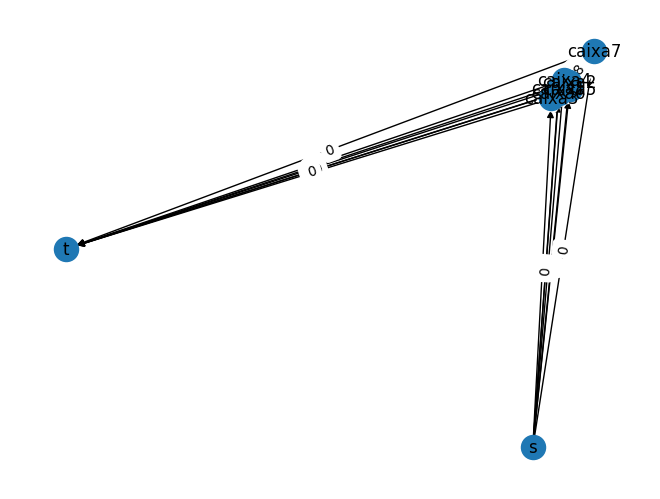

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Dados do problema
volumes = [33, 30, 26, 24, 19, 18, 17]
demandas = [40, 30, 50, 40, 20, 40, 20]
estoques = [40, 40, 60, 40, 20, 30, 10]
custo_fixo = 10  # Custo fixo de produção por tipo de caixa

# Criar grafo direcionado
G = nx.DiGraph()

# Nó de origem (produção) e destino (demandas)
source = 's'
sink = 't'

# Adicionar nós para cada tipo de caixa
for i in range(len(volumes)):
    G.add_node('caixa{}'.format(i+1))

# Adicionar arestas do nó de origem para os tipos de caixas (produção)
for i in range(len(volumes)):
    G.add_edge(source, 'caixa{}'.format(i+1), capacity=estoques[i], weight=0)

# Adicionar arestas dos tipos de caixas para o nó de destino (demandas)
for j in range(len(demandas)):
    G.add_edge('caixa{}'.format(j+1), sink, demand=demandas[j], weight=0)

# Adicionar arestas entre os tipos de caixas (redirecionamento)
for i in range(len(volumes)):
    for j in range(len(volumes)):
        if volumes[i] > volumes[j]:
            G.add_edge('caixa{}'.format(i+1), 'caixa{}'.format(j+1), capacity=estoques[i], weight=volumes[i] + custo_fixo)

# Resolver o problema de otimização em rede
flow_cost, flow_dict = nx.maximum_flow(G, source, sink)
print(flow_cost)
# Verificar se todas as demandas foram atendidas
demand_met = True
for j in range(len(demandas)):
    demand_node = 'caixa{}'.format(j+1)
    out_flow = sum(flow_dict[demand_node].values())
    if out_flow < demandas[j]:
        demand_met = False
        break

# Imprimir resultados
if demand_met:
    print("Todas as demandas foram atendidas.")
else:
    print("Algumas demandas não foram completamente atendidas.")

# Desenhar o grafo (opcional)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


In [ ]:
pip install networkx

In [ ]:
pip install matplotlib

ex2

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def max_teams_compatibility(compatibility_matrix):
    # Criar um grafo direcionado
    G = nx.DiGraph()

    # Adicionar vértice de origem (s) e sumidouro (t)
    source = 's'
    sink = 't'
    G.add_node(source)
    G.add_node(sink)

    num_a = len(compatibility_matrix)  # Número de nós A
    num_b = len(compatibility_matrix[0])  # Número de nós B

    # Adicionar nós do departamento A
    nodes_a = [f'A{i+1}' for i in range(num_a)]
    for a_node in nodes_a:
        G.add_edge(source, a_node, capacity=1)  # Capacidade 1 da fonte para cada nó A

    # Adicionar nós do departamento B
    nodes_b = [f'B{j+1}' for j in range(num_b)]
    for b_node in nodes_b:
        G.add_edge(b_node, sink, capacity=1)  # Capacidade 1 de cada nó B para o sumidouro

    # Adicionar arestas com capacidade 1 baseadas na matriz de compatibilidade
    for i in range(num_a):
        for j in range(num_b):
            if compatibility_matrix[i][j] == 'X':
                a_node = nodes_a[i]
                b_node = nodes_b[j]
                G.add_edge(a_node, b_node, capacity=1)  # Aresta com capacidade 1 entre A_i e B_j se há compatibilidade

    # Resolver o problema de fluxo máximo
    flow_value, flow_dict = nx.maximum_flow(G, source, sink)

    # Identificar equipes formadas
    teams = []
    for a_node in nodes_a:
        for b_node, flow in flow_dict[a_node].items():
            if flow > 0 and b_node != source:
                teams.append((a_node, b_node))
    return flow_value, teams,G

# Matriz de compatibilidade
compatibility_matrix = [
    ['', 'X', '', '', '', 'X', '', 'X'],
    ['', '', 'X', 'X', 'X', '', '', ''],
    ['X', 'X', '', '', '', 'X', '', ''],
    ['X', '', '', '', '', 'X', '', 'X'],
    ['', '', 'X', 'X', 'X', '', 'X', ''],
    ['X', 'X', '', '', 'X', '', 'X', ''],
    ['X', '', 'X', '', '', 'X', '', 'X']
]

# Chamada da função para resolver o problema
max_teams, teams_list,G = max_teams_compatibility(compatibility_matrix)

# Imprimir resultados
print(f"Número máximo de equipes: {max_teams}")
print("Equipes formadas:")
for team in teams_list:
    print(f"Equipe: {team[0]} - {team[1]}")


Número máximo de equipes: 7
Equipes formadas:
Equipe: A1 - B2
Equipe: A2 - B4
Equipe: A3 - B1
Equipe: A4 - B6
Equipe: A5 - B3
Equipe: A6 - B5
Equipe: A7 - B8


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def max_equipes_compatibilidade(matriz_compatibilidade):
    # Criar um grafo direcionado
    G = nx.DiGraph()

    # Adicionar vértice de origem (s) e sumidouro (t)
    origem = 's'
    sumidouro = 't'
    G.add_node(origem)
    G.add_node(sumidouro)

    num_a = len(matriz_compatibilidade)  # Número de nós A
    num_b = len(matriz_compatibilidade[0])  # Número de nós B

    # Adicionar nós do departamento A
    nos_a = [f'A{i+1}' for i in range(num_a)]
    for no_a in nos_a:
        G.add_edge(origem, no_a, capacity=1)  # Capacidade 1 da fonte para cada nó A

    # Adicionar nós do departamento B
    nos_b = [f'B{j+1}' for j in range(num_b)]
    for no_b in nos_b:
        G.add_edge(no_b, sumidouro, capacity=1)  # Capacidade 1 de cada nó B para o sumidouro

    # Adicionar arestas com capacidade 1 baseadas na matriz de compatibilidade
    for i in range(num_a):
        for j in range(num_b):
            if matriz_compatibilidade[i][j] == 'X':
                no_a = nos_a[i]
                no_b = nos_b[j]
                G.add_edge(no_a, no_b, capacity=1)  # Aresta com capacidade 1 entre A_i e B_j se há compatibilidade

    # Resolver o problema de fluxo máximo
    valor_fluxo, fluxo_dict = nx.maximum_flow(G, origem, sumidouro)

    # Identificar equipes formadas
    equipes = []
    for no_a in nos_a:
        for no_b, fluxo in fluxo_dict[no_a].items():
            if fluxo > 0 and no_b != origem:
                equipes.append((no_a, no_b))
    return valor_fluxo, equipes, G

# Matriz de compatibilidade
matriz_compatibilidade = [
    ['', 'X', '', '', '', 'X', '', 'X'],
    ['', '', 'X', 'X', 'X', '', '', ''],
    ['X', 'X', '', '', '', 'X', '', ''],
    ['X', '', '', '', '', 'X', '', 'X'],
    ['', '', 'X', 'X', 'X', '', 'X', ''],
    ['X', 'X', '', '', 'X', '', 'X', ''],
    ['X', '', 'X', '', '', 'X', '', 'X']
]

# Chamada da função para resolver o problema
max_equipes, equipes_formadas, G = max_equipes_compatibilidade(matriz_compatibilidade)

# Imprimir resultados
print(f"Número máximo de equipes: {max_equipes}")
print("Equipes formadas:")
for equipe in equipes_formadas:
    print(f"Equipe: {equipe[0]} - {equipe[1]}")


Número máximo de equipes: 7
Equipes formadas:
Equipe: A1 - B2
Equipe: A2 - B4
Equipe: A3 - B1
Equipe: A4 - B6
Equipe: A5 - B3
Equipe: A6 - B5
Equipe: A7 - B8


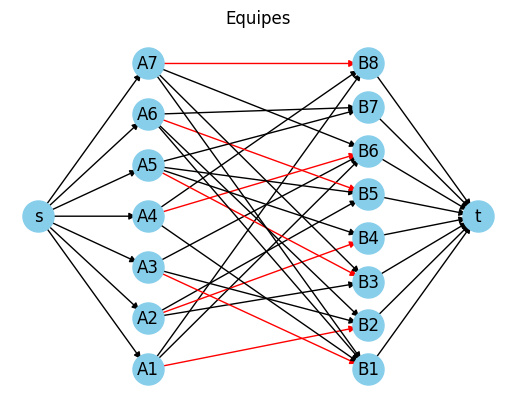

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_custom_graph(G, teams_edges):
    # Criar um layout customizado para posicionar os nodos no gráfico
    pos = {}

    # Adicionar posição do nodo fonte (s) à esquerda
    pos['s'] = (-1,0.5)

    # Adicionar posição dos nodos do departamento A em uma coluna à esquerda de s
    num_a = sum(1 for node in G.nodes() if node.startswith('A'))
    for i, a_node in enumerate([node for node in G.nodes() if node.startswith('A')]):
        pos[a_node] = (0, i / (num_a - 1))

    # Adicionar posição dos nodos do departamento B em uma coluna à direita de s
    num_b = sum(1 for node in G.nodes() if node.startswith('B'))
    for i, b_node in enumerate([node for node in G.nodes() if node.startswith('B')]):
        pos[b_node] = (2, i / (num_b - 1))

    # Adicionar posição do nodo sumidouro (t) à direita
    pos['t'] = (3, 0.5)

    # Desenhar os nodos, arestas e rótulos
    nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=500)

    # Desenhar as arestas destacando as arestas que representam times (em vermelho)
    for edge in G.edges():
        if edge in teams_edges:
            nx.draw_networkx_edges(G, pos, edgelist=[edge], edge_color='red', arrows=True)
        else:
            nx.draw_networkx_edges(G, pos, edgelist=[edge], arrows=True)

    nx.draw_networkx_labels(G, pos)

    # Exibir o gráfico
    plt.title("Equipes")
    plt.axis('off')
    plt.show()

# Exemplo de uso:
# Supondo que você já tenha criado o grafo G usando a função max_teams_compatibility
# e tenha obtido a lista de arestas das equipes (teams_list)

# Visualizar o grafo G com layout customizado, destacando as arestas das equipes
visualize_custom_graph(G, teams_list)


ex3


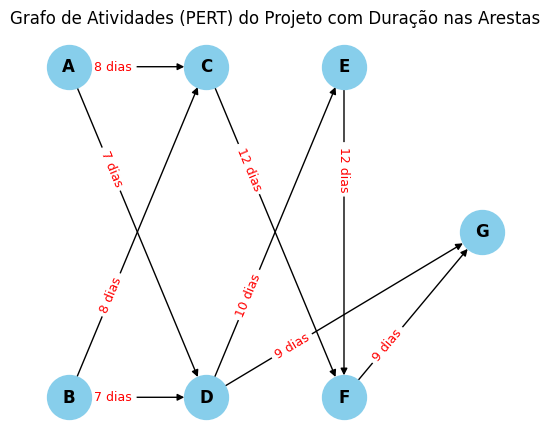

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Criar um grafo direcionado
G = nx.DiGraph()

# Adicionar nós (atividades)
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
G.add_nodes_from(nodes)

# Adicionar arestas (dependências) com duração das atividades
edges = [
    ('A', 'C', {'duration': 8}),  # Atividade A para C com duração de 8 dias
    ('A', 'D', {'duration': 7}),  # Atividade A para D com duração de 7 dias
    ('B', 'C', {'duration': 8}),  # Atividade B para C com duração de 8 dias
    ('B', 'D', {'duration': 7}),  # Atividade B para D com duração de 7 dias
    ('D', 'E', {'duration': 10}),  # Atividade D para E com duração de 10 dias
    ('D', 'G', {'duration': 9}),   # Atividade D para G com duração de 9 dias
    ('C', 'F', {'duration': 12}),  # Atividade C para F com duração de 12 dias
    ('E', 'F', {'duration': 12}),  # Atividade E para F com duração de 12 dias
    ('F', 'G', {'duration': 9})    # Atividade F para G com duração de 9 dias
]
G.add_edges_from(edges)

# Definir posição dos nós manualmente para visualização
pos = {
    'A': (0, 1),
    'B': (0, 0),
    'C': (1, 1),
    'D': (1, 0),
    'E': (2, 1),
    'F': (2, 0),
    'G': (3, 0.5)
}

# Desenhar o grafo
plt.figure(figsize=(5, 4))
# Extrair as informações de duração das arestas para etiquetas
edge_labels = {(u, v): f"{G[u][v]['duration']} dias" for u, v in G.edges()}

nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=12, font_weight='bold', arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels,label_pos=0.3, font_color='red', font_size=9)  # Adicionar etiquetas das arestas

plt.title("Grafo de Atividades (PERT) do Projeto com Duração nas Arestas")
plt.show()


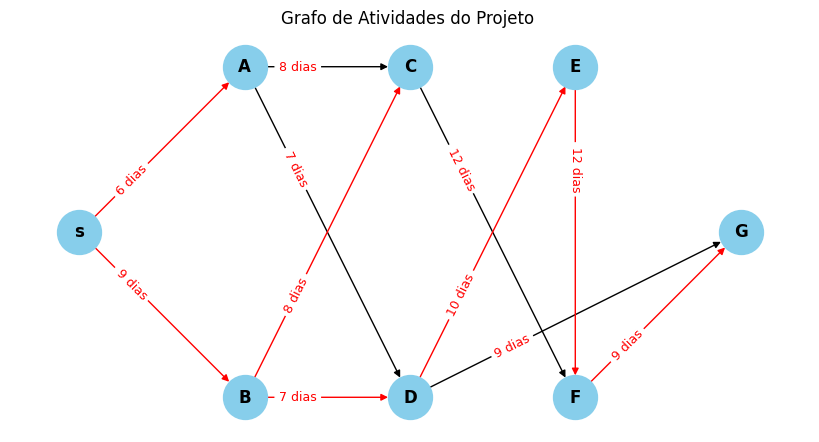

Folgas Totais:
s -> A: 0 dias
s -> B: 0 dias
A -> C: 3 dias
A -> D: 3 dias
B -> C: 0 dias
B -> D: 0 dias
C -> F: 9 dias
D -> E: 0 dias
D -> G: 22 dias
E -> F: 0 dias
F -> G: 0 dias

Atividades Críticas:
s -> A
s -> B
B -> C
B -> D
D -> E
E -> F
F -> G

Duração mínima do projeto: 47 dias


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def calcular_tempo_inicio_mais_cedo(G):
    # Ordenação topológica dos nós
    ordem_topologica = list(nx.topological_sort(G))

    # Calcular tempo de início mais cedo para cada nó
    inicio_mais_cedo = {}
    for no in ordem_topologica:
        if len(list(G.predecessors(no))) == 0:
            inicio_mais_cedo[no] = 0
        else:
            max_tempo_predecessor = max([inicio_mais_cedo[antecessor] + G[antecessor][no]['duration'] for antecessor in G.predecessors(no)])
            inicio_mais_cedo[no] = max_tempo_predecessor

    return inicio_mais_cedo

def calcular_folga_total(G, inicio_mais_cedo):
    # Calcular folga total para cada atividade
    folga_total = {}
    for u, v in G.edges():
        folga_total[(u, v)] = inicio_mais_cedo[v] - (inicio_mais_cedo[u] + G[u][v]['duration'])

    return folga_total

def identificar_atividades_criticas(G, folga_total):
    # Identificar atividades críticas (folga total = 0)
    atividades_criticas = [(u, v) for (u, v), folga in folga_total.items() if folga == 0]

    return atividades_criticas

# Criar o grafo
G = nx.DiGraph()

# Adicionar nó inicial "s"
G.add_node('s')

# Adicionar nós e arestas com duração
arestas = [
    ('s', 'A', {'duration': 6}),
    ('s', 'B', {'duration': 9}),
    ('A', 'C', {'duration': 8}),
    ('A', 'D', {'duration': 7}),
    ('B', 'C', {'duration': 8}),
    ('B', 'D', {'duration': 7}),
    ('D', 'E', {'duration': 10}),
    ('D', 'G', {'duration': 9}),
    ('C', 'F', {'duration': 12}),
    ('E', 'F', {'duration': 12}),
    ('F', 'G', {'duration': 9})
]
G.add_edges_from(arestas)

# Calcular os tempos de início mais cedo
inicio_mais_cedo_nos = calcular_tempo_inicio_mais_cedo(G)

# Calcular as folgas totais
folga_total_arestas = calcular_folga_total(G, inicio_mais_cedo_nos)

# Identificar as atividades críticas
atividades_criticas = identificar_atividades_criticas(G, folga_total_arestas)

# Definir posição dos nós
pos = {
    's': (0, 0.5),
    'A': (1, 1),
    'B': (1, 0),
    'C': (2, 1),
    'D': (2, 0),
    'E': (3, 1),
    'F': (3, 0),
    'G': (4, 0.5)
}

# Desenhar o grafo
plt.figure(figsize=(8, 4))

# Lista de cores das arestas (vermelho para críticas, preto para não críticas)
cores_arestas = ['red' if aresta in atividades_criticas else 'black' for aresta in G.edges()]

# Desenhar o grafo com cores das arestas determinadas
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=12, font_weight='bold', arrows=True, edge_color=cores_arestas)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{G[u][v]['duration']} dias" for u, v in G.edges()}, label_pos=0.3, font_color='red', font_size=9)

plt.title("Grafo de Atividades do Projeto ")
plt.show()

# Imprimir os resultados
print("Folgas Totais:")
for aresta, folga in folga_total_arestas.items():
    print(f"{aresta[0]} -> {aresta[1]}: {folga} dias")

print("\nAtividades Críticas:")
for atividade in atividades_criticas:
    print(f"{atividade[0]} -> {atividade[1]}")

# Duração mínima do projeto (tempo de término mais cedo de G)
duracao_minima_projeto = inicio_mais_cedo_nos['G']
print(f"\nDuração mínima do projeto: {duracao_minima_projeto} dias")


ex4

In [ ]:
import networkx as nx

def calculate_min_time_for_flow(graph, source, sink, required_flow):
    # Encontrar o fluxo máximo usando o algoritmo de Edmonds-Karp
    flow_value, flow_dict = nx.maximum_flow(graph, source, sink)

    if flow_value < required_flow:
        return float('inf')  # Se não há fluxo suficiente para atender à demanda, retorno infinito

    # Calcular o tempo mínimo total usando o fluxo encontrado
    min_time = 0
    for u in graph.nodes:
        for v in graph[u]:
            if graph[u][v]['capacity'] > 0:  # Apenas considerar arcos com capacidade > 0
                flow_through_uv = flow_dict[u][v]
                time_uv = graph[u][v]['time']
                min_time += flow_through_uv * time_uv

    return min_time

# Criar o grafo
G = nx.DiGraph()

# Adicionar nós
nodes = [1, 2, 3, 4, 5, 6, 7, 8, 9]
G.add_nodes_from(nodes)

# Adicionar arcos com capacidade máxima e tempo de viagem
edges = [
    (1, 2, {'capacity': 80, 'time': 10}),
    (1, 3, {'capacity': 60, 'time': 20}),
    (2, 4, {'capacity': 60, 'time': 10}),
    (2, 5, {'capacity': 10, 'time': 30}),
    (3, 4, {'capacity': 20, 'time': 20}),
    (3, 5, {'capacity': 40, 'time': 40}),
    (4, 6, {'capacity': 30, 'time': 30}),
    (4, 7, {'capacity': 10, 'time': 40}),
    (5, 6, {'capacity': 20, 'time': 20}),
    (5, 7, {'capacity': 20, 'time': 20}),
    (5, 8, {'capacity': 30, 'time': 30}),
    (6, 9, {'capacity': 40, 'time': 10}),
    (7, 9, {'capacity': 50, 'time': 30}),
    (8, 9, {'capacity': 60, 'time': 20})
]
G.add_edges_from(edges)

# Calcular o tempo total mínimo necessário para que 90 carros transitem de 1 a 9
source = 1
sink = 9
required_flow = 90

min_time = calculate_min_time_for_flow(G, source, sink, required_flow)
print(f"Tempo mínimo necessário para transportar {required_flow} carros de {source} a {sink}: {min_time} minutos")


Tempo mínimo necessário para transportar 90 carros de 1 a 9: 7800 minutos


Tempo mínimo necessário para transportar 90 carros de 1 a 9: 7800 minutos


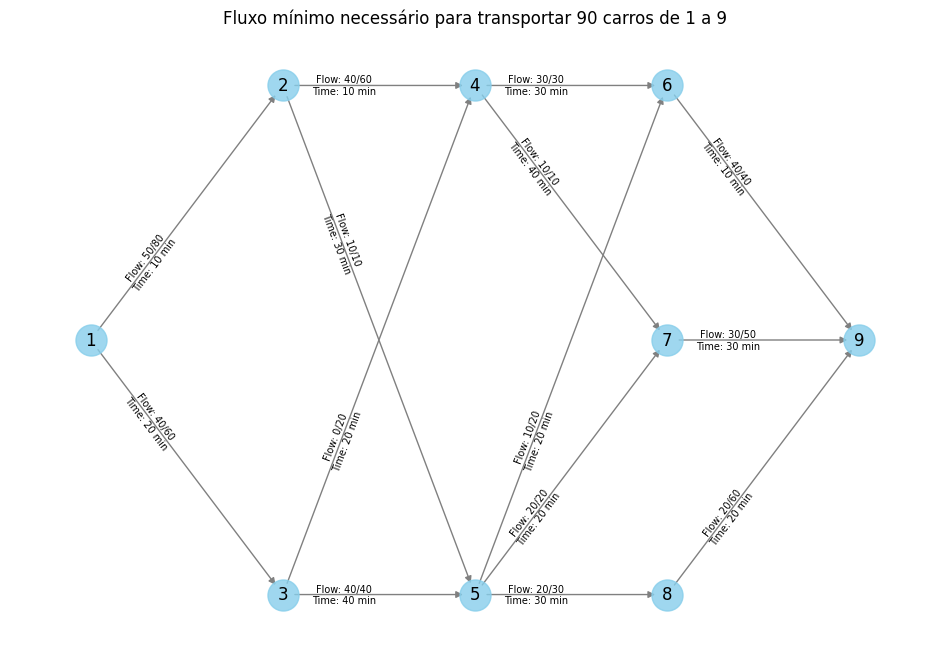

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def calculate_min_time_for_flow(graph, source, sink, required_flow):
    # Encontrar o fluxo máximo usando o algoritmo de Edmonds-Karp
    flow_value, flow_dict = nx.maximum_flow(graph, source, sink)

    if flow_value < required_flow:
        return float('inf'), None  # Se não há fluxo suficiente para atender à demanda, retorno infinito

    # Calcular o tempo mínimo total usando o fluxo encontrado
    min_time = 0
    flow_details = {}

    for u in graph.nodes:
        for v in graph[u]:
            if graph[u][v]['capacity'] > 0:  # Apenas considerar arcos com capacidade > 0
                flow_through_uv = flow_dict[u][v]
                time_uv = graph[u][v]['time']
                min_time += flow_through_uv * time_uv
                flow_details[(u, v)] = flow_through_uv

    return min_time, flow_details

# Criar o grafo
G = nx.DiGraph()

# Adicionar nós
nodes = [1, 2, 3, 4, 5, 6, 7, 8, 9]
G.add_nodes_from(nodes)

# Adicionar arcos com capacidade máxima e tempo de viagem
edges = [
    (1, 2, {'capacity': 80, 'time': 10}),
    (1, 3, {'capacity': 60, 'time': 20}),
    (2, 4, {'capacity': 60, 'time': 10}),
    (2, 5, {'capacity': 10, 'time': 30}),
    (3, 4, {'capacity': 20, 'time': 20}),
    (3, 5, {'capacity': 40, 'time': 40}),
    (4, 6, {'capacity': 30, 'time': 30}),
    (4, 7, {'capacity': 10, 'time': 40}),
    (5, 6, {'capacity': 20, 'time': 20}),
    (5, 7, {'capacity': 20, 'time': 20}),
    (5, 8, {'capacity': 30, 'time': 30}),
    (6, 9, {'capacity': 40, 'time': 10}),
    (7, 9, {'capacity': 50, 'time': 30}),
    (8, 9, {'capacity': 60, 'time': 20})
]
G.add_edges_from(edges)

# Calcular o tempo total mínimo necessário para que 90 carros transitem de 1 a 9
source = 1
sink = 9
required_flow = 90

min_time, flow_details = calculate_min_time_for_flow(G, source, sink, required_flow)

# Imprimir o tempo mínimo necessário
print(f"Tempo mínimo necessário para transportar {required_flow} carros de {source} a {sink}: {min_time} minutos")

# Desenhar o grafo com os detalhes de fluxo
plt.figure(figsize=(12, 8))

# Nodes positions
pos = {
    1: (0, 0.5),
    2: (1, 1),
    3: (1, 0),
    4: (2, 1),
    5: (2, 0),
    6: (3, 1),
    7: (3, 0.5),
    8: (3, 0) ,
    9: (4, 0.5)
}

# Desenhar os nós e as arestas
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=500, alpha=0.8)
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

for (u, v) in G.edges():
    flow = flow_details.get((u, v), 0)
    capacity = G[u][v]['capacity']
    time = G[u][v]['time']
    label = f'Flow: {flow}/{capacity}\nTime: {time} min'
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): label}, label_pos=0.3, font_size=7)

nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)

plt.title(f"Fluxo mínimo necessário para transportar {required_flow} carros de {source} a {sink}")
plt.axis('off')
plt.show()


Tempo mínimo necessário para transportar 90 carros de 1 a 9: 7800 minutos


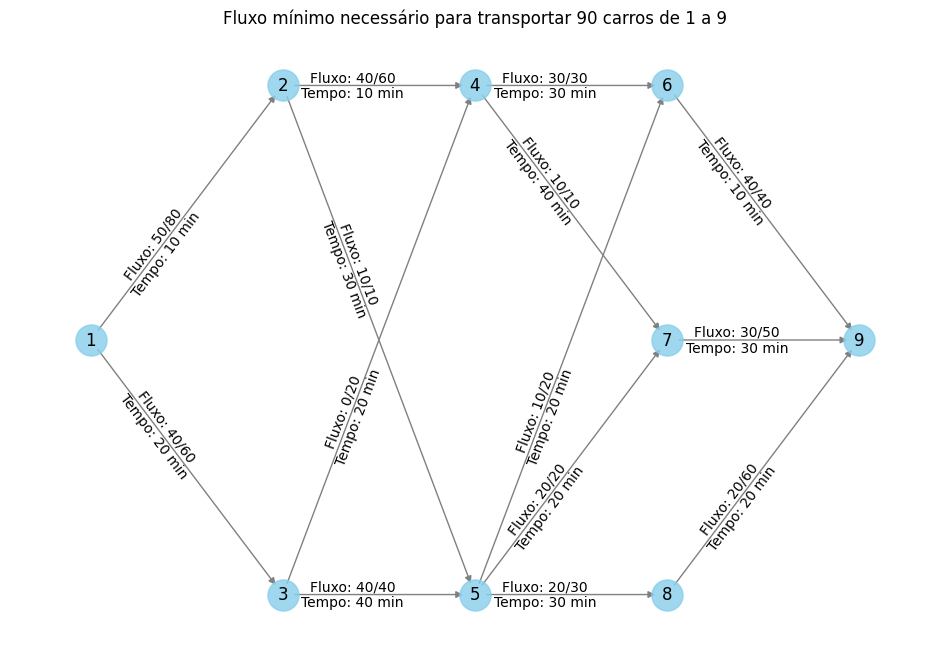

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def criar_grafo_e_resolver():
    volumes = [33, 30, 26, 24, 19, 18, 17]
    demandas = [40, 30, 50, 40, 20, 40, 20]
    estoques = [40, 40, 60, 40, 20, 30, 10]

    G = nx.DiGraph()

    # Adicionando nós de oferta e demanda
    for i in range(1, 8):
        no_oferta = f"s{i}"
        no_demanda = f"d{i}"
        G.add_node(no_oferta, demand=-estoques[i-1])
        G.add_node(no_demanda, demand=demandas[i-1])

    custo_fixo = 10  # Custo fixo

    # Adicionando arestas entre os nós de oferta e demanda
    for i in range(1, 8):
        for j in range(1, 8):
            if volumes[i-1] >= volumes[j-1]:  # Caixa i pode satisfazer demanda de caixa j
                G.add_edge(f"s{i}", f"d{j}", capacity=min(estoques[i-1], demandas[j-1]),
                           weight=volumes[i-1] + custo_fixo)

    custo_fluxo, dicionario_fluxo = nx.network_simplex(G)
    return G, custo_fluxo, dicionario_fluxo

def desenhar_grafo(G, dicionario_fluxo):
    pos = nx.shell_layout(G)  # Usando um layout circular para melhor visualização
    plt.figure(figsize=(12, 8))

    # Nós
    nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=700)
    nx.draw_networkx_labels(G, pos)

    # Arestas
    nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)

    # Etiquetas das arestas com fluxos, capacidades e custos
    etiquetas_arestas = {(u, v): f"{dicionario_fluxo[u][v]}/{G[u][v]['capacity']}\nCusto: {G[u][v]['weight']}"
                         for u, v in G.edges if G[u][v]['capacity'] > 0 and dicionario_fluxo[u][v] > 0}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=etiquetas_arestas, label_pos=0.3, font_color='red')

    plt.title("Fluxo de custo mínimo para atendimento das demandas de caixas")
    plt.axis('off')
    plt.show()

# Resolver o problema e desenhar o grafo
G, custo_total_fluxo, dicionario_fluxo = criar_grafo_e_resolver()
print("Custo total do fluxo mínimo:", custo_total_fluxo)
desenhar_grafo(G, dicionario_fluxo)

Custo total do fluxo mínimo: 8530


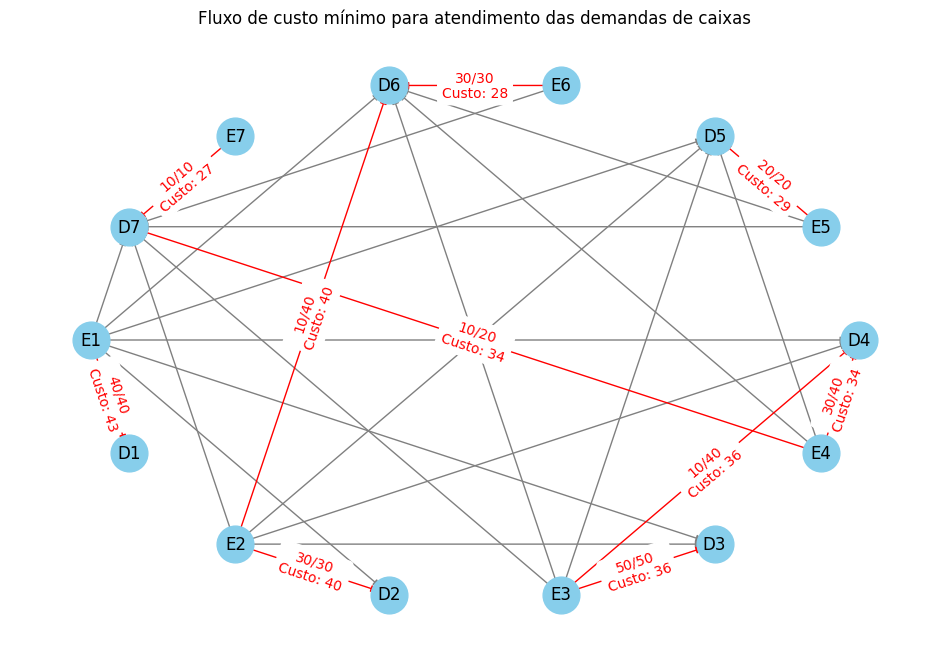

In [ ]:

import networkx as nx
import matplotlib.pyplot as plt

def criar_grafo_e_resolver():
    volumes = [33, 30, 26, 24, 19, 18, 17]
    demandas = [40, 30, 50, 40, 20, 40, 20]
    estoques = [40, 40, 60, 40, 20, 30, 10]

    G = nx.DiGraph()

    # Adicionando nós de oferta e demanda
    for i in range(1, 8):
        no_oferta = f"E{i}"
        no_demanda = f"D{i}"
        G.add_node(no_oferta, demand=-estoques[i-1])
        G.add_node(no_demanda, demand=demandas[i-1])

    custo_fixo = 10  # Custo fixo

    # Adicionando arestas entre os nós de oferta e demanda
    for i in range(1, 8):
        for j in range(1, 8):
            if volumes[i-1] >= volumes[j-1]:  # Caixa i pode satisfazer demanda de caixa j
                G.add_edge(f"E{i}", f"D{j}", capacity=min(estoques[i-1], demandas[j-1]),
                           weight=volumes[i-1] + custo_fixo)

    custo_fluxo, dicionario_fluxo = nx.network_simplex(G)
    return G, custo_fluxo, dicionario_fluxo

def desenhar_grafo(G, dicionario_fluxo):
    pos = nx.shell_layout(G)  # Usando um layout circular para melhor visualização
    plt.figure(figsize=(12, 8))

    # Nós
    nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=700)
    nx.draw_networkx_labels(G, pos)

    # Arestas
    todas_as_arestas = set(G.edges())
    arestas_com_fluxo = {e for e in G.edges() if dicionario_fluxo[e[0]][e[1]] > 0}
    arestas_sem_fluxo = todas_as_arestas - arestas_com_fluxo
    nx.draw_networkx_edges(G, pos, edgelist=arestas_sem_fluxo, edge_color='gray', arrows=True)
    nx.draw_networkx_edges(G, pos, edgelist=arestas_com_fluxo, edge_color='red', arrows=True)

    # Etiquetas das arestas com fluxos, capacidades e custos
    etiquetas_arestas = {(u, v): f"{dicionario_fluxo[u][v]}/{G[u][v]['capacity']}\nCusto: {G[u][v]['weight']}"
                         for u, v in G.edges if G[u][v]['capacity'] > 0 and dicionario_fluxo[u][v] > 0}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=etiquetas_arestas, label_pos=0.5, font_color='red')

    plt.title("Fluxo de custo mínimo para atendimento das demandas de caixas")
    plt.axis('off')
    plt.show()

# Resolver o problema e desenhar o grafo
G, custo_total_fluxo, dicionario_fluxo = criar_grafo_e_resolver()
print("Custo total do fluxo mínimo:", custo_total_fluxo)
desenhar_grafo(G, dicionario_fluxo)

Custo total do fluxo mínimo: 8530


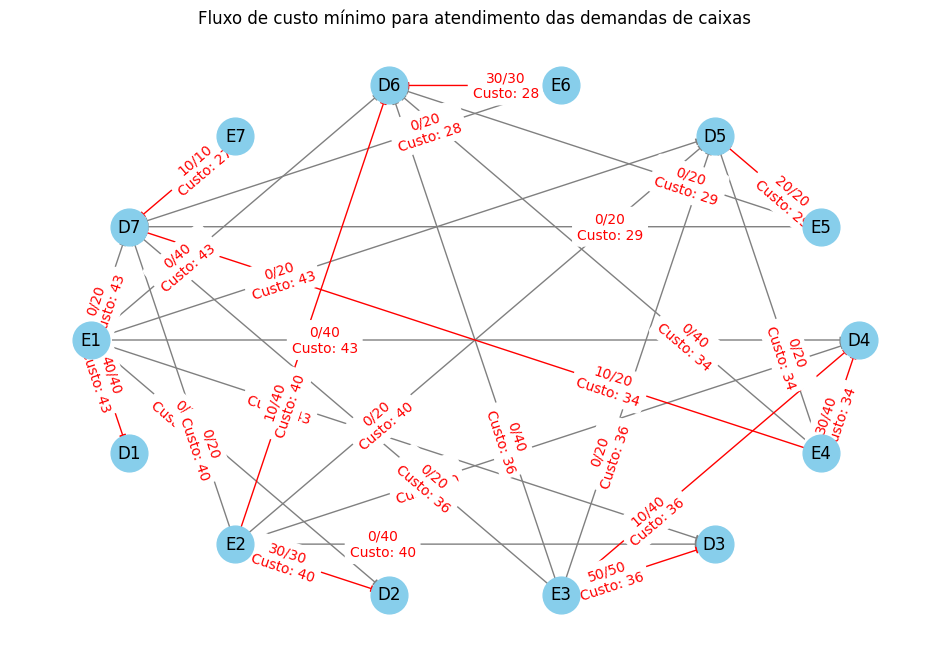

In [ ]:

import networkx as nx
import matplotlib.pyplot as plt

def criar_grafo_e_resolver():
    volumes = [33, 30, 26, 24, 19, 18, 17]
    demandas = [40, 30, 50, 40, 20, 40, 20]
    estoques = [40, 40, 60, 40, 20, 30, 10]

    G = nx.DiGraph()

    # Adicionando nós de oferta e demanda
    for i in range(1, 8):
        no_oferta = f"E{i}"
        no_demanda = f"D{i}"
        G.add_node(no_oferta, demand=-estoques[i-1])
        G.add_node(no_demanda, demand=demandas[i-1])

    custo_fixo = 10  # Custo fixo

    # Adicionando arestas entre os nós de oferta e demanda
    for i in range(1, 8):
        for j in range(1, 8):
            if volumes[i-1] >= volumes[j-1]:  # Caixa i pode satisfazer demanda de caixa j
                G.add_edge(f"E{i}", f"D{j}", capacity=min(estoques[i-1], demandas[j-1]),
                           weight=volumes[i-1] + custo_fixo)

    custo_fluxo, dicionario_fluxo = nx.network_simplex(G)
    return G, custo_fluxo, dicionario_fluxo

def desenhar_grafo(G, dicionario_fluxo):
    pos = nx.shell_layout(G)  # Usando um layout circular para melhor visualização
    plt.figure(figsize=(12, 8))

    # Nós
    nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=700)
    nx.draw_networkx_labels(G, pos)

    # Arestas
    todas_as_arestas = set(G.edges())
    arestas_com_fluxo = {e for e in G.edges() if dicionario_fluxo[e[0]][e[1]] > 0}
    arestas_sem_fluxo = todas_as_arestas - arestas_com_fluxo
    nx.draw_networkx_edges(G, pos, edgelist=arestas_sem_fluxo, edge_color='gray', arrows=True)
    nx.draw_networkx_edges(G, pos, edgelist=arestas_com_fluxo, edge_color='red', arrows=True)

    # Etiquetas das arestas com fluxos, capacidades e custos
    etiquetas_arestas = {(u, v): f"{dicionario_fluxo[u][v]}/{G[u][v]['capacity']}\nCusto: {G[u][v]['weight']}"
                         for u, v in G.edges if G[u][v]['capacity'] > 0}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=etiquetas_arestas, label_pos=0.3, font_color='red')

    plt.title("Fluxo de custo mínimo para atendimento das demandas de caixas")
    plt.axis('off')
    plt.show()

# Resolver o problema e desenhar o grafo
G, custo_total_fluxo, dicionario_fluxo = criar_grafo_e_resolver()
print("Custo total do fluxo mínimo:", custo_total_fluxo)
desenhar_grafo(G, dicionario_fluxo)

#Lista 8

In [ ]:
import numpy as np

# Limites das variáveis
max_x = 4
max_y = 6

# Inicializando a tabela com valores muito negativos
# para garantir que apenas valores viáveis sejam considerados
F = np.full((max_x + 1, max_y + 1), -np.inf)

# Inicializando o valor base
F[0, 0] = 0

# Preenchendo a tabela
for y in range(max_y + 1):
    for x in range(max_x + 1):
        if 3 * x + 2 * y <= 18:
            if x > 0:
                F[x, y] = max(F[x, y], F[x-1, y] + 3)
            if y > 0:
                F[x, y] = max(F[x, y], F[x, y-1] + 5)

# Encontrando o valor máximo na tabela
max_value = -np.inf
best_x, best_y = -1, -1

for x in range(max_x + 1):
    for y in range(max_y + 1):
        if F[x, y] > max_value:
            max_value = F[x, y]
            best_x, best_y = x, y

(best_x, best_y, max_value)


(2, 6, 36.0)

In [ ]:
grafo = {
    'INI': {'A': 5, 'B': 3},
    'A': {'C': 4, 'D': 2},
    'B': {'E': 3},
    'C': {'F': 1, 'G': 4},
    'D': {'H': 6, 'I': 2},
    'E': {'H': 6, 'I': 2},
    'F': {'J': 5},
    'G': {'K': 4},
    'H': {'K': 4},
    'I': {'L': 7},
    'J': {'FIM': 0},
    'K': {'FIM': 0},
    'L': {'FIM': 0},
    'FIM': {}
}

def encontrar_caminho_critico(grafo):
    tempo_mais_longo = {no: float('-inf') for no in grafo}
    predecessor = {no: None for no in grafo}
    tempo_mais_longo['INI'] = 0

    for no in grafo:
        for vizinho in grafo[no]:
            if tempo_mais_longo[vizinho] < tempo_mais_longo[no] + grafo[no][vizinho]:
                tempo_mais_longo[vizinho] = tempo_mais_longo[no] + grafo[no][vizinho]
                predecessor[vizinho] = no

    return tempo_mais_longo, predecessor

def obter_caminho_critico(predecessor):
    caminho = []
    no = 'FIM'
    while no is not None:
        caminho.append(no)
        no = predecessor[no]
    caminho.reverse()
    return caminho

tempo_mais_longo, predecessor = encontrar_caminho_critico(grafo)

print("Tempos mais longos para cada nó:")
for no in tempo_mais_longo:
    print(f"{no}: {tempo_mais_longo[no]}")


caminho_critico = obter_caminho_critico(predecessor)
print("Caminho crítico:", " -> ".join(caminho_critico))


Tempos mais longos para cada nó:
INI: 0
A: 5
B: 3
C: 9
D: 7
E: 6
F: 10
G: 13
H: 13
I: 9
J: 15
K: 17
L: 16
FIM: 17
Caminho crítico: INI -> A -> C -> G -> K -> FIM


In [ ]:
def max_profit_distribution(lucro, num_veiculos):
    num_lojas = len(lucro)

    # Inicializar matriz de lucro L e matriz de decisão D
    L = [[0] * (num_veiculos + 1) for _ in range(num_lojas + 1)]
    D = [[0] * (num_veiculos + 1) for _ in range(num_lojas + 1)]

    # Preencher a matriz de lucro L
    for i in range(1, num_lojas + 1):
        for j in range(0, num_veiculos + 1):
            max_lucro = 0
            for k in range(0, j + 1):
                if L[i-1][j-k] + lucro[i-1][k] > max_lucro:
                    max_lucro = L[i-1][j-k] + lucro[i-1][k]
                    D[i][j] = k
            L[i][j] = max_lucro

    # Rastrear a distribuição ótima de veículos
    distrib = [0] * num_lojas
    veiculos_restantes = num_veiculos
    for i in range(num_lojas, 0, -1):
        distrib[i-1] = D[i][veiculos_restantes]
        veiculos_restantes -= D[i][veiculos_restantes]

    # Retornar o lucro máximo e a distribuição de veículos
    return L[num_lojas][num_veiculos], distrib

# Tabela de lucros (linhas: lojas, colunas: número de veículos)
lucro = [
    [0, 5, 9, 14, 17, 21],  # Loja 1
    [0, 6, 11, 15, 19, 22], # Loja 2
    [0, 4, 9, 13, 18, 20]   # Loja 3
]

num_veiculos = 5
max_lucro, distrib = max_profit_distribution(lucro, num_veiculos)

print(f"Lucro máximo: {max_lucro}")
print(f"Distribuição de veículos: {distrib}")


Lucro máximo: 25
Distribuição de veículos: [3, 2, 0]


In [ ]:
def min_cost(usinas, custos, anos, max_construcoes):
    n = len(usinas)
    max_usinas = usinas[-1]

    # Inicializar tabela de custos e matriz de decisões
    dp = [[float('inf')] * (max_usinas + 1) for _ in range(n + 1)]
    dp[0][0] = 0  # Custo zero para zero usinas no início
    decision = [[0] * (max_usinas + 1) for _ in range(n + 1)]

    # Preencher a tabela de DP
    for ano in range(1, n + 1):
        for total_usinas in range(max_usinas + 1):
            if total_usinas >= usinas[ano - 1]:  # Garantir que atingimos o número mínimo de usinas acumuladas
                for construidas in range(min(max_construcoes, total_usinas) + 1):
                    prev_usinas = total_usinas - construidas
                    if prev_usinas >= 0:
                        custo_total = dp[ano - 1][prev_usinas] + construidas * (custos[ano - 1] + 1500)
                        if custo_total < dp[ano][total_usinas]:
                            dp[ano][total_usinas] = custo_total
                            decision[ano][total_usinas] = construidas

    # Rastrear a construção ótima
    construcoes = [0] * n
    total_usinas = max_usinas
    for ano in range(n, 0, -1):
        construcoes[ano - 1] = decision[ano][total_usinas]
        total_usinas -= decision[ano][total_usinas]

    # O menor custo para construir todas as usinas no último ano
    return dp[n][max_usinas], construcoes

# Dados fornecidos
anos = [1, 2, 3, 4, 5, 6]
usinas = [1, 2, 4, 6, 7, 8]
custos = [5400, 5600, 5800, 5700, 5500, 5200]
max_construcoes = 3

custo_minimo, construcoes = min_cost(usinas, custos, anos, max_construcoes)
print(f"O menor custo total para a construção das usinas é: ${custo_minimo:.2f}")
print("Construções por ano:")
for ano, construcao in enumerate(construcoes, 1):
    print(f"Ano {ano}: {construcao} usina(s)")


O menor custo total para a construção das usinas é: $55700.00
Construções por ano:
Ano 1: 3 usina(s)
Ano 2: 3 usina(s)
Ano 3: 0 usina(s)
Ano 4: 0 usina(s)
Ano 5: 1 usina(s)
Ano 6: 1 usina(s)
